In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Dataset clean up:

### In the first few lines take lammetized column from one DF and  attach it with another DF to have the final_dataset

In [6]:
# df = pd.read_csv("./twtr_roberta_sentiment.csv", low_memory=False)

In [10]:
# df_r = pd.read_csv("./clean_data_lmtd_stmd.csv", low_memory=False)

In [15]:
# df_r["roberta_sentiment"] = df["roberta_sentiment"]

In [18]:
# df_r["blob_sentiment"] = df["blob_sentiment"]

In [27]:
# df_r.rename(columns={"lemd_stmd" : "final_clean_text"}, inplace=True)
# df_r

In [24]:
# df_r.to_csv("final_dataset_twtr_sentiment_RAIHAN.csv", index=False )

In [3]:
df = pd.read_csv("../final_dataset_twtr_sentiment_RAIHAN.csv", low_memory=False, usecols=(['date_created', 'user_description', 'user_created', 'user_followers',
       'user_friends', 'user_favourites', 'user_verified','locations', 'date', 'is_retweet', 'month_year','blob_sentiment', 'clean_hashtags','includes_abortion',
       'final_clean_text', 'roberta_sentiment']))

In [4]:
df

date_created                                   user_description  \
0      7/30/21 23:53  Sociafy is an influencer-based content discove...   
1      7/30/21 23:51  Home of Crypto Communities. $ATMOS \n\nhttps:/...   
2      7/30/21 23:50  Developer, Artist, Investor, Entrepreneur, Eff...   
3      7/30/21 23:49  Comprehensive, up-to-date news coverage, aggre...   
4      7/30/21 23:49  Gay Progressive Patriot. #NYC's the greatest c...   
...              ...                                                ...   
72797  8/15/22 22:06  Gay Progressive Patriot. #NYC's the greatest c...   
72798  8/15/22 22:01  Runs @GeekAlabama; #Aspie proud! #ASD.  I‚Äö√Ñ...   
72799  8/15/22 22:01  Board Certified | CEO @NeighborhoodPsy Writer ...   
72800  8/15/22 21:59  Israel Cruz is running for U.S. Senate in the ...   
72801  8/15/22 21:57  Profile run by Lucky (the monster) (ze/hir/hir...   

         user_created  user_followers  user_friends  user_favourites  \
0        9/30/11 5:59           36219           181              930   
1        2/9/17 23:15            2426          1104             8173   
2         7/9/09 4:07             495          2681             6930   
3        7/24/17 7:39             340           114                1   
4       6/20/08 18:32            6451          2806             4257   
...               ...             ...           ...              ...   
72797   6/20/08 18:32            6343          2786             4226   
72798   4/27/09 20:24            4668          5122           112650   
72799    3/21/08 4:29            3397          2163             3541   
72800  10/13/21 18:18            1159          1469             1459   
72801    6/4/21 23:31              69           739              665   

       user_verified           date  is_retweet month_year includes_abortion  \
0              False  7/30/21 23:53       False     21-Jul                no   
1              False  7/30/21 23:51       False     21-Jul                no   
2              False  7/30/21 23:50       False     21-Jul                no   
3              False  7/30/21 23:49       False     21-Jul                no   
4              False  7/30/21 23:49       False     21-Jul                no   
...              ...            ...         ...        ...               ...   
72797          False  8/15/22 22:06       False     22-Aug                no   
72798          False  8/15/22 22:01       False     22-Aug                no   
72799          False  8/15/22 22:01       False     22-Aug                no   
72800          False  8/15/22 21:59       False     22-Aug                no   
72801          False  8/15/22 21:57       False     22-Aug                no   

           locations blob_sentiment  \
0      united states        neutral   
1      united states        neutral   
2         california        neutral   
3      united states        neutral   
4           new york       negative   
...              ...            ...   
72797       new york        neutral   
72798        alabama        neutral   
72799       new york        neutral   
72800   pennsylvania        neutral   
72801     california        neutral   

                                          clean_hashtags  \
0                                        politics videos   
1                                          blog politics   
2                                   politics justice war   
3      news covid usa canada uk instagram love corona...   
4                              politics trump corruption   
...                                                  ...   
72797                          politics trump corruption   
72798  video politics liberal liberallogic woke woken...   
72799  psychology evil politics psychiatry law humani...   
72800                      PA Politics Fetterman StopIDL   
72801  demonicmachines politics thismachinekillsfascists   

                                        final_clean_text roberta_sentiment  
0             

In [5]:
  df[["blob_sentiment", "clean_hashtags", "final_clean_text", "roberta_sentiment"]][40:50]

blob_sentiment                                     clean_hashtags  \
40        neutral                                           Politics   
41        neutral                  ClimateCrisis California Politics   
42        neutral                                           Politics   
43        neutral                                    politics videos   
44        neutral                                   politics opinion   
45        neutral                          politics trump corruption   
46        neutral  news covid usa canada uk instagram love corona...   
47        neutral  Coronavirus Democrats JoeBiden politics polls ...   
48        neutral  GA01 PalimenoforCongress Georgia Congress Demo...   
49        neutral                                           Politics   

                                     final_clean_text roberta_sentiment  
40  hous fail extend evict moratorium ahead 6week ...          negative  
41  read thread understand deep hypocrisi run vein...          negative  
42  mile taylor longer abl teach usc semest cpf fe...           neutral  
43  rep chip roy slam fellow gop amp dem support d...          negative  
44               cuomo beg new yorker come home would           neutral  
45  major republican support use forc save tradit ...           neutral  
46                  dog get zoomi here what realli go           neutral  
47            patriot readi fight back govern tyranni           neutral  
48  would appreci support 20212022 contribut help ...          positive  
49  current gop moral econom fiscal social philoso...          negative

In [6]:
df.iloc[72798]

date_created                                             8/15/22 22:01
user_description     Runs @GeekAlabama; #Aspie proud! #ASD.  I‚Äö√Ñ...
user_created                                             4/27/09 20:24
user_followers                                                    4668
user_friends                                                      5122
user_favourites                                                 112650
user_verified                                                    False
date                                                     8/15/22 22:01
is_retweet                                                       False
month_year                                                      22-Aug
includes_abortion                                                   no
locations                                                      alabama
blob_sentiment                                                 neutral
clean_hashtags       video politics liberal liberallogic woke woken...
final_

# Drilling into Blob Sentiment Analysis Classifcation

In [9]:
colors = ["peru","rosybrown", "teal"]

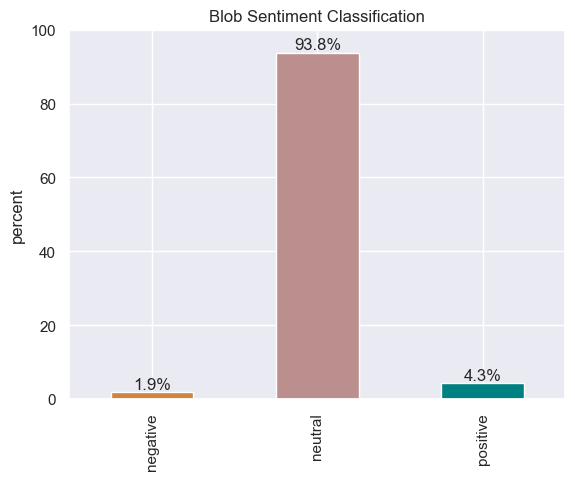

In [10]:
# bar label
for index, value in enumerate(df["blob_sentiment"].value_counts(normalize=True, sort=False)
                              .reindex(["negative", "neutral", "positive"]) * 100):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')
    
((df["blob_sentiment"].value_counts(normalize=True, sort="blob_sentiment")*100)
 .reindex(["negative", "neutral", "positive"])).plot(kind="bar",color=colors)
plt.title("Blob Sentiment Classification")
plt.yticks(range(0, 101,20))
plt.ylabel("percent")
plt.show()

# Drilling into Roberta Sentiment Analysis Classifcation

In [298]:
colors = ["peru","rosybrown", "teal"]

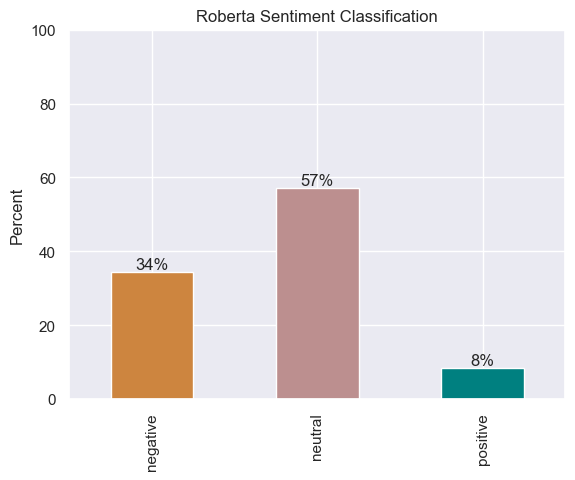

In [33]:
#  create chart
((df["roberta_sentiment"].value_counts(normalize=True, sort=False) * 100)
    .reindex(["negative", "neutral", "positive"])
    .plot(kind="bar", color=colors))

# Bar label
for index, value in enumerate(df["roberta_sentiment"].value_counts(normalize=True, sort=False)
                              .reindex(["negative", "neutral", "positive"]) * 100):
    plt.text(index, value, f'{value:.0f}%', ha='center', va='bottom')

plt.title("Roberta Sentiment Classification")
plt.yticks(range(0, 101, 20))
plt.ylabel("Percent")
plt.show()


# Comparing Blog classification with Roberta classification

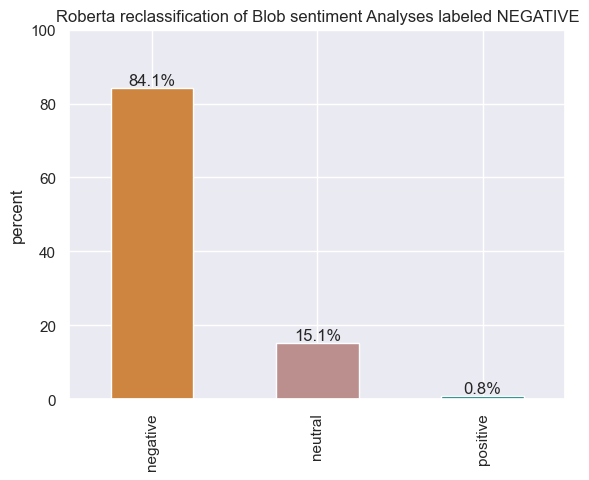

In [17]:
blob_neg = df['blob_sentiment'] == 'negative'
filtered_df = df[blob_neg]
((filtered_df["roberta_sentiment"].value_counts(normalize=True, sort=False)*100).reindex(["negative", "neutral", "positive"])).plot(kind="bar", color=colors)
plt.title("Roberta reclassification of Blob sentiment Analyses labeled NEGATIVE")

for index, value in enumerate(filtered_df["roberta_sentiment"].value_counts(normalize=True, sort=False)
                              .reindex(["negative", "neutral", "positive"]) * 100):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

    plt.ylabel("percent")
plt.yticks(range(0, 101,20))
plt.show()

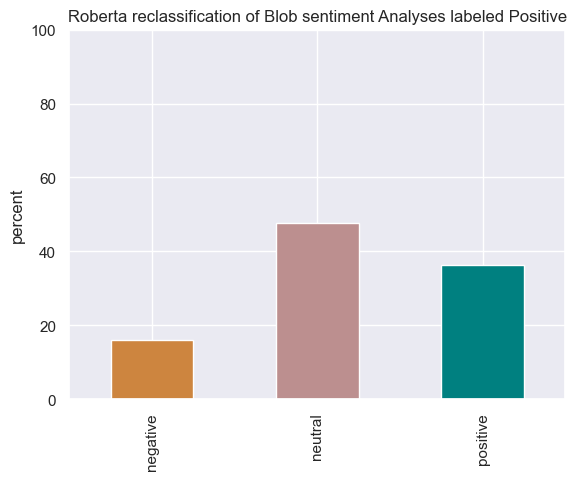

In [141]:
blob_pos = df['blob_sentiment'] == 'positive'
filtered_df = df[blob_pos]
filtered_df

((filtered_df["roberta_sentiment"].value_counts(normalize=True, sort=False)*100).reindex(["negative", "neutral", "positive"])).plot(kind="bar", color=colors)
plt.title("Roberta reclassification of Blob sentiment Analyses labeled Positive")
plt.ylabel("percent")
plt.yticks(range(0, 101,20))
plt.show()

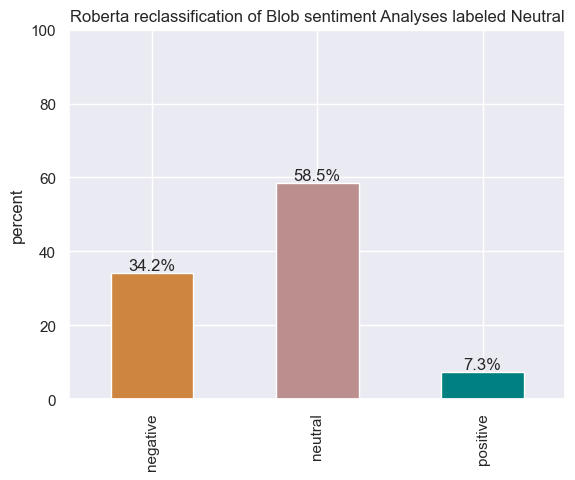

In [18]:
blob_pos = df['blob_sentiment'] == 'neutral'
filtered_df = df[blob_pos]
filtered_df

((filtered_df["roberta_sentiment"].value_counts(normalize=True, sort=False)*100).reindex(["negative", "neutral", "positive"])).plot(kind="bar", color=colors)
plt.title("Roberta reclassification of Blob sentiment Analyses labeled Neutral")

for index, value in enumerate(filtered_df["roberta_sentiment"].value_counts(normalize=True, sort=False)
                              .reindex(["negative", "neutral", "positive"]) * 100):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

plt.ylabel("percent")
plt.yticks(range(0, 101,20))
plt.show()


In [21]:
test = pd.read_csv("../test_blob.csv")

In [22]:
test["roberta_sentiment"] = df["roberta_sentiment"]
test

Unnamed: 0   date_created  \
0               0  7/30/21 23:53   
1               1  7/30/21 23:51   
2               2  7/30/21 23:50   
3               3  7/30/21 23:49   
4               4  7/30/21 23:49   
...           ...            ...   
72797       72797  8/15/22 22:06   
72798       72798  8/15/22 22:01   
72799       72799  8/15/22 22:01   
72800       72800  8/15/22 21:59   
72801       72801  8/15/22 21:57   

                                        user_description    user_created  \
0      Sociafy is an influencer-based content discove...    9/30/11 5:59   
1      Home of Crypto Communities. $ATMOS \n\nhttps:/...    2/9/17 23:15   
2      Developer, Artist, Investor, Entrepreneur, Eff...     7/9/09 4:07   
3      Comprehensive, up-to-date news coverage, aggre...    7/24/17 7:39   
4      Gay Progressive Patriot. #NYC's the greatest c...   6/20/08 18:32   
...                                                  ...             ...   
72797  Gay Progressive Patriot. #NYC's the greatest c...   6/20/08 18:32   
72798  Runs @GeekAlabama; #Aspie proud! #ASD.  I‚Äö√Ñ...   4/27/09 20:24   
72799  Board Certified | CEO @NeighborhoodPsy Writer ...    3/21/08 4:29   
72800  Israel Cruz is running for U.S. Senate in the ...  10/13/21 18:18   
72801  Profile run by Lucky (the monster) (ze/hir/hir...    6/4/21 23:31   

       user_followers  user_friends  user_favourites  user_verified  \
0               36219           181              930          False   
1                2426          1104             8173          False   
2                 495          2681             6930          False   
3                 340           114                1          False   
4                6451          2806             4257          False   
...               ...           ...              ...            ...   
72797            6343          2786             4226          False   
72798            4668          5122           112650          False   
72799            3397          2163             3541          False   
72800            1159          1469             1459          False   
72801              69           739              665          False   

                date                                               text  ...  \
0      7/30/21 23:53  O‚Äö√Ñ√¥Reilly predicts THIS is What DOOMS Bid...  ...   
1      7/30/21 23:51  Corruption in Politics\n#blog #politics \nhttp...  ...   
2      7/30/21 23:50  90% of US drone strikes kill civilians. An ope...  ...   
3      7/30/21 23:49  100,000-Year-Old Fossil of Largest-Ever Vampir...  ...   
4      7/30/21 23:49  Via @RawStory: 'People will die': Congress bla...  ...   
...              ...                                                ...  ...   
72797  8/15/22 22:06  Via @RawStory: Trump doesn't think Merrick Gar...  ...   
72798  8/15/22 22:01  It's Okay To Be Woke: Congrats to Alabama, whe...  ...   
72799  8/15/22 22:01  What constitutes "Everyday Evil"?\n\nPsycholog...  ...   
72800  8/15/22 21:59  @DrOz I know you won't as that would mean you ...  ...   
72801  8/15/22 21:57  if you have a #demonicmachines pedal, you shou...  ...   

      month_year                                    parsed_hashtags  \
0         21-Jul                             ['politics', 'videos']   
1         21-Jul                               ['blog', 'politics']   
2         21-Jul                     ['politics', 'justice', 'war']   
3         21-Jul  ['news', 'covid', 'usa', 'canada', 'uk', 'inst...   
4         21-Jul                ['politics', 'trump', 'corruption']   
...          ...                                                ...   
72797     22-Aug                ['politics', 'trump', 'corruption']   
72798     22-Aug  ['video', 'politics', 'liberal', 'liberallogic...   
72799     22-Aug  ['psychology', 'evil', 'politics', 'psychiatry...   
72800     22-Aug         ['PA', 'Politics', 'Fetterman', 'StopIDL']   
72801     22-Aug  ['demonicmachines', 'politics', 'thismachineki..

# Let's recalibrate Blob and see if we can improve the sentiment analysis

use < -1 as "negetive" and > 0.5 as positive

In [146]:
# blob_pos = test["blob_sentiment"] == 'neutral'
# filtered_df = test[blob_pos]
# filtered_df

# ax = sns.barplot(x=filtered_df["roberta_sentiment"].value_counts(normalize=True).index,
#                  y=filtered_df["roberta_sentiment"].value_counts(normalize=True) * 100)

# ax.set(xlabel="Sentiment", ylabel="Percentage", 
#        title="Roberta reclassification of Blob sentiment Analyses labeled NEUTRAL after model adjustment")

# plt.show()

**About 5% improvement can be observed** 

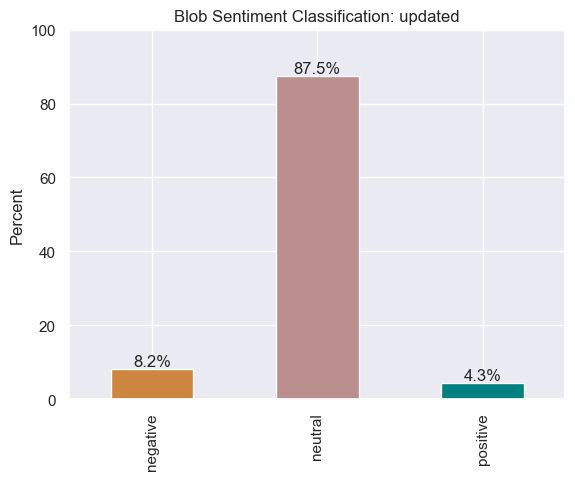

In [23]:
for index, value in enumerate(test["blob_sentiment"].value_counts(normalize=True, sort=False)
                              .reindex(["negative", "neutral", "positive"]) * 100):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

((test["blob_sentiment"].value_counts(normalize=True, sort=False)*100).reindex(["negative", "neutral", "positive"])).plot(kind="bar", color=colors)
plt.title("Blob Sentiment Classification: updated")
plt.ylabel("Percent")
plt.yticks(range(0,101,20))
plt.show()

# From here and on we will only work with Roberta Model

In [49]:
df[df["locations"]== "new york"]["roberta_sentiment"].value_counts()

neutral     7236
negative    6447
positive     496
Name: roberta_sentiment, dtype: int64

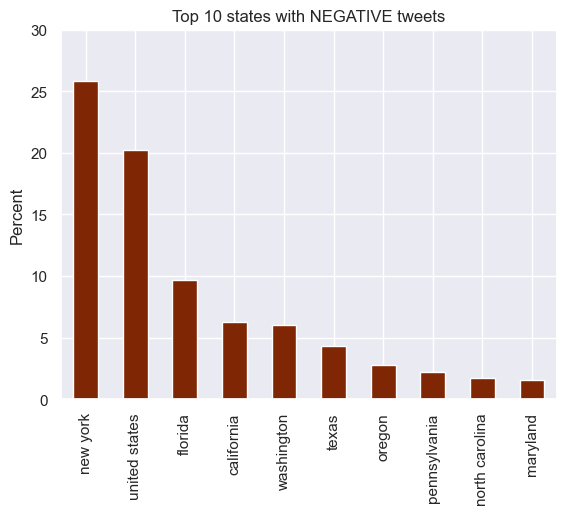

In [158]:


(df[df["roberta_sentiment"] == "negative"]["locations"].value_counts(normalize=True)
 .mul(100)
 [:10]
 .plot(kind="bar", cmap="Oranges_r")
)
plt.title("Top 10 states with NEGATIVE tweets")
plt.ylabel("Percent")
plt.yticks(range(0, 31, 5))
plt.show()


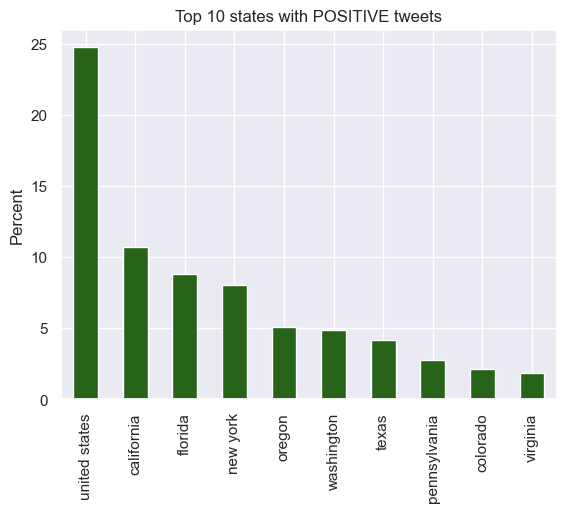

In [167]:
df[df["roberta_sentiment"]== "positive"]["locations"].value_counts(normalize="True").mul(100)[:10].plot(kind="bar", cmap="PiYG_r")
plt.title("Top 10 states with POSITIVE tweets")
plt.ylabel("Percent")
plt.show()

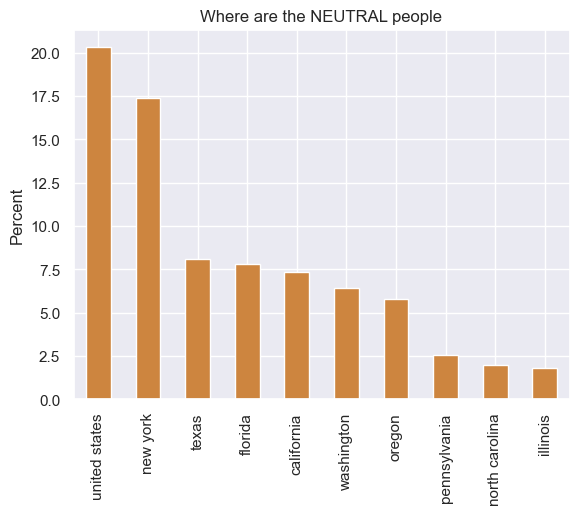

In [185]:
df[df["roberta_sentiment"]== "neutral"]["locations"].value_counts(normalize="True").mul(100)[:10].plot(kind="bar", color="peru")
plt.title("Where are the NEUTRAL people")
plt.ylabel("Percent")
plt.show()

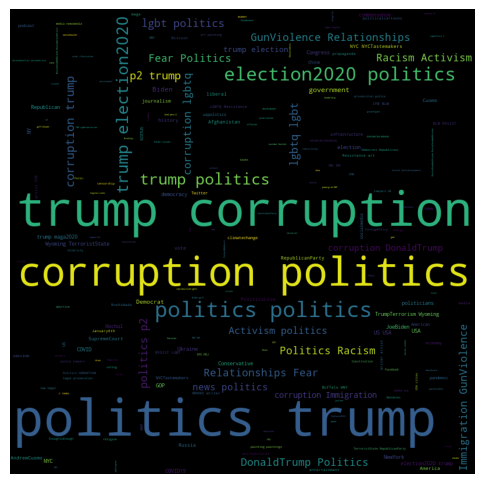

<Figure size 640x480 with 0 Axes>

In [32]:
new_neg = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new_neg["clean_hashtags"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new_neg.loc[:, "clean_hashtags"] = new_neg.loc[:, "clean_hashtags"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new_neg["clean_hashtags"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

plt.figure(figsize=(6,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_neg.png')


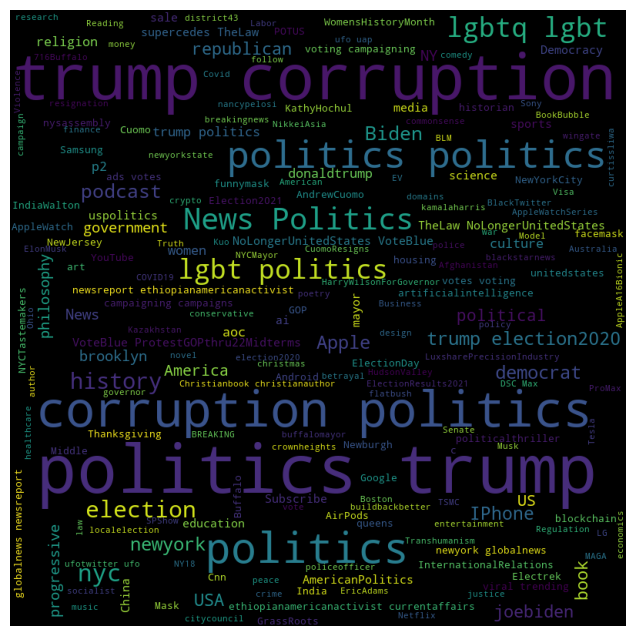

<Figure size 640x480 with 0 Axes>

In [189]:
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["clean_hashtags"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_hashtags"] = new.loc[:, "clean_hashtags"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_hashtags"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_pos.png')

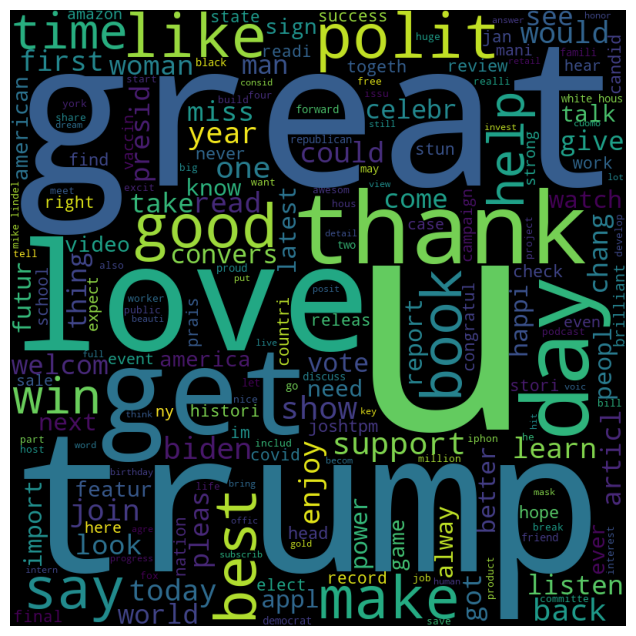

<Figure size 640x480 with 0 Axes>

In [196]:
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
text = new["final_clean_text"]
stop_words = ["amp", "new"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black',stopwords=stop_words).generate(hashtags_str)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_pos_text.png')

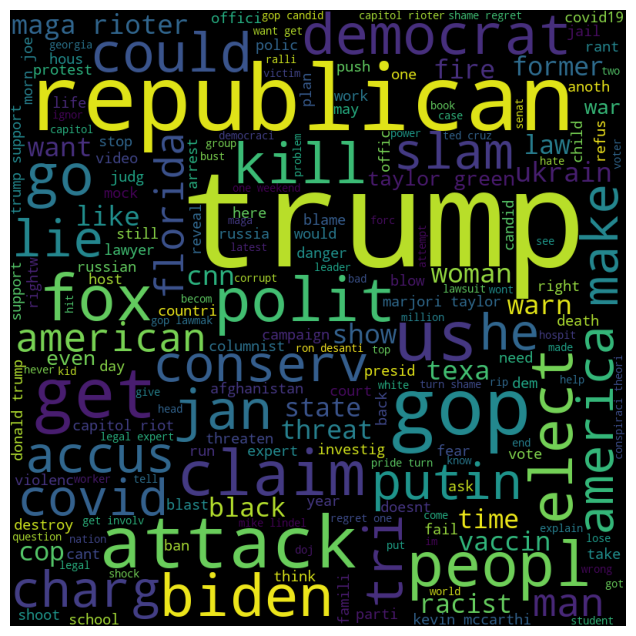

<Figure size 640x480 with 0 Axes>

In [215]:
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["final_clean_text"]

stop_words = ["amp", "new","report", "say", "u", "face", "call", "watch", "counld", "use"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str)


plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_neg_text.png')

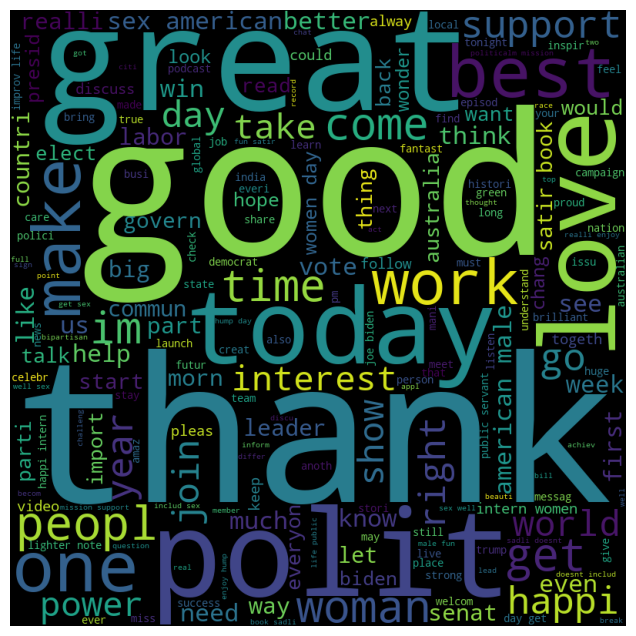

<Figure size 640x480 with 0 Axes>

In [315]:
new = df[(df["locations"] == "united states") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["final_clean_text"]

stop_words = ["amp", "new","report", "say", "u", "face", "call", "watch", "counld", "use"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str)


plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_neg_text.png')

# Let's try make multiple wordcloud at the same time
## Starting with NY

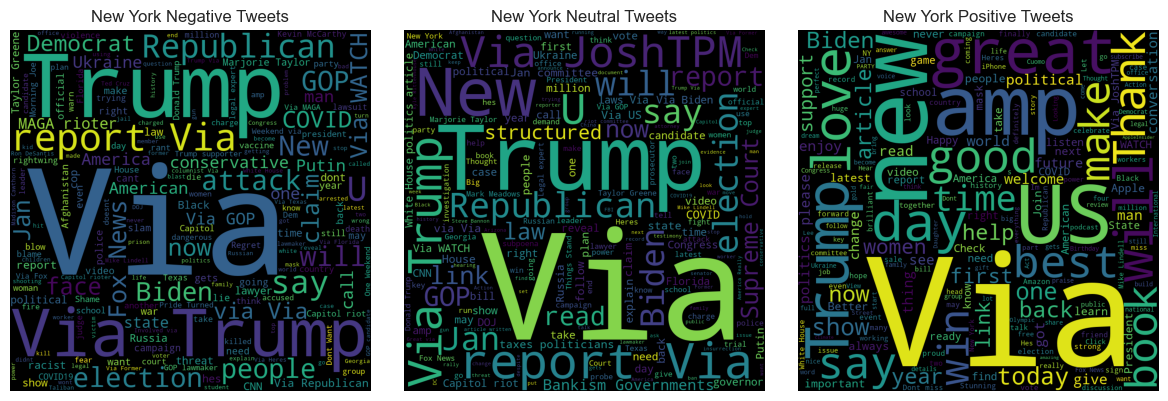

In [229]:


# Create a DataFrame
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 6, 8, 10]})

# Create three figures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot data on the first two axes

new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[0].imshow(wordcloud)
axes[0].set_title('New York Negative Tweets')
axes[0].axis("off")


new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "neutral")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[1].imshow(wordcloud)
axes[1].set_title('New York Neutral Tweets')
axes[1].axis("off")


# Include the word cloud in the third figure
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[2].imshow(wordcloud)
axes[2].set_title('New York Positive Tweets')
axes[2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Display the figures
plt.show()


In [216]:

# Create a DataFrame
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 6, 8, 10]})

# Create three figures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Plot data on the first two axes

new = df[(df["locations"] == "california") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["final_clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[0].imshow(wordcloud)
axes[0].set_title('California Negative Tweets')
axes[0].axis("off")


new = df[(df["locations"] == "california") & (df['roberta_sentiment'] == "neutral")].copy()
hashtags = new["final_clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[1].imshow(wordcloud)
axes[1].set_title('California Neutral Tweets')
axes[1].axis("off")


# Include the word cloud in the third figure
new = df[(df["locations"] == "california") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["final_clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[2].imshow(wordcloud)
axes[2].set_title('California Positive Tweets')
axes[2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Display the figures
plt.show()


machachusets and new jersey 


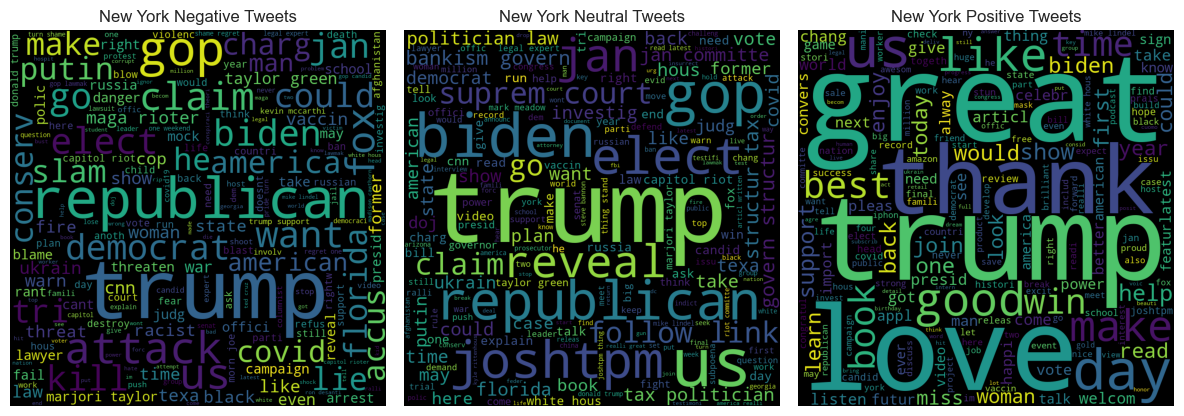

{'new': 54, 'mask': 5, 'perfect': 2, 'gift': 4, 'parti': 4, 'special': 3, 'event': 7, 'view': 5, 'collect': 4, 'elon': 1, 'musk': 1, 'announc': 4, 'tesla': 2, 'ai': 1, 'day': 24, 'august': 2, 'maga': 1, 'brag': 3, 'break': 6, 'pelosi': 2, 'offic': 5, 'best': 21, 'life': 6, 'cowork': 1, 'fed': 2, 'thread': 2, 'time': 19, 'know': 9, 'amp': 40, 'induc': 1, 'fair': 4, 'kind': 2, 'impress': 2, 'right': 8, 'anyway': 2, 'need': 9, 'talk': 9, 'mani': 7, 'read': 14, 'jami': 1, 'lee': 4, 'curti': 1, 'proudli': 1, 'share': 6, 'daughter': 4, 'transgend': 1, 'proven': 2, 'skill': 1, 'field': 2, 'plan': 3, 'open': 3, 'invest': 5, 'firm': 2, 'someth': 2, 'excel': 2, 'even': 7, 'usa': 1, 'sunisa': 1, 'win': 19, 'olymp': 4, 'allaround': 1, 'gold': 5, 'bile': 2, 'cheer': 2, 'statist': 1, 'help': 19, 'improv': 2, 'everyth': 4, 'care': 3, 'appl': 10, 'record': 8, 'billion': 3, 'q3': 1, 'obliter': 1, 'street': 4, 'expect': 7, 'appleinsid': 4, 'airbubbl': 1, 'offer': 3, 'respit': 2, 'warsaw': 1, 'pollut': 1

In [361]:

# Create a DataFrame
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 6, 8, 10]})


stop_words = ["amp", "new","report", "say", "u", "face", "call", "watch", "counld", "use", "chronlaw", "polit", "peopl", "get"]

# Create three figures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Plot data on the first two axes

new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["final_clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(stopwords = stop_words, width=800, height=800, background_color='black').generate(hashtags_str)

axes[0].imshow(wordcloud)
axes[0].set_title('New York Negative Tweets')
axes[0].axis("off")


new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "neutral")].copy()
hashtags = new["final_clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(stopwords = stop_words, width=800, height=800, background_color='black').generate(hashtags_str)

axes[1].imshow(wordcloud)
axes[1].set_title('New York Neutral Tweets')
axes[1].axis("off")


# Include the word cloud in the third figure
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["final_clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["final_clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(stopwords = stop_words, width=800, height=800, background_color='black').generate(hashtags_str)

axes[2].imshow(wordcloud)
axes[2].set_title('New York Positive Tweets')
axes[2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Display the figures
plt.show()
print( WordCloud().process_text(hashtags_str))

In [362]:
ny_cloud = {'new': 54, 'mask': 5, 'perfect': 2, 'gift': 4, 'parti': 4, 'special': 3, 'event': 7, 'view': 5, 'collect': 4, 'elon': 1, 'musk': 1, 'announc': 4, 'tesla': 2, 'ai': 1, 'day': 24, 'august': 2, 'maga': 1, 'brag': 3, 'break': 6, 'pelosi': 2, 'offic': 5, 'best': 21, 'life': 6, 'cowork': 1, 'fed': 2, 'thread': 2, 'time': 19, 'know': 9, 'amp': 40, 'induc': 1, 'fair': 4, 'kind': 2, 'impress': 2, 'right': 8, 'anyway': 2, 'need': 9, 'talk': 9, 'mani': 7, 'read': 14, 'jami': 1, 'lee': 4, 'curti': 1, 'proudli': 1, 'share': 6, 'daughter': 4, 'transgend': 1, 'proven': 2, 'skill': 1, 'field': 2, 'plan': 3, 'open': 3, 'invest': 5, 'firm': 2, 'someth': 2, 'excel': 2, 'even': 7, 'usa': 1, 'sunisa': 1, 'win': 19, 'olymp': 4, 'allaround': 1, 'gold': 5, 'bile': 2, 'cheer': 2, 'statist': 1, 'help': 19, 'improv': 2, 'everyth': 4, 'care': 3, 'appl': 10, 'record': 8, 'billion': 3, 'q3': 1, 'obliter': 1, 'street': 4, 'expect': 7, 'appleinsid': 4, 'airbubbl': 1, 'offer': 3, 'respit': 2, 'warsaw': 1, 'pollut': 1, 'biden': 16, 'belov': 1, 'donald': 1, 'trump': 31, 'presid': 12, 'survey': 1, 'happi': 10, '65th': 1, 'birthday': 5, 'rep': 1, 'william': 1, 'laci': 1, 'clay': 1, 'jr': 1, 'birthplac': 3, 'st': 1, 'loui': 1, 'missouri': 1, 'futur': 10, 'today': 15, 'consum': 1, 'confid': 2, 'surprisingli': 3, 'strong': 7, 'juli': 3, 'diver': 3, 'tom': 1, 'daley': 1, 'gay': 3, 'man': 11, 'champion': 3, 'alexa': 1, 'final': 8, 'name': 4, 'voic': 5, 'chang': 12, 'amazon': 7, 'echo': 1, 'speech': 3, 'impedi': 1, 'reckless': 1, 'airwav': 1, 'radioiv': 1, 'blessedpretti': 1, 'satisfi': 1, 'career': 1, 'far': 2, 'amaz': 4, 'see': 12, 'team': 3, 'canvass': 1, 'thank': 28, 'support': 18, 'campaign': 7, 'fun': 3, 'idea': 3, 'halloween': 1, 'theme': 2, 'list': 2, 'love': 30, 'chat': 3, 'podcast': 6, 'import': 10, 'voter': 3, 'understand': 1, 'present': 2, 'polit': 24, 'issu': 6, 'public': 6, 'librari': 2, 'spread': 2, 'good': 23, 'word': 5, 'pleas': 11, 'retweet': 1, 'vault': 1, 'declar': 2, 'franc': 2, 'america': 9, 'greatest': 3, 'alli': 2, 'yesterday': 2, 'meet': 6, 'white': 3, 'hous': 6, 'american': 9, 'ny': 7, 'met': 4, 'sign': 9, 'andrew': 3, 'cuomo': 5, 'play': 3, 'shortstop': 1, 'got': 12, 'great': 33, 'hand': 2, 'full': 5, 'surpris': 4, 'highlight': 3, 'resign': 2, 'remark': 1, 'sober': 1, 'report': 10, 'card': 2, 'yet': 2, 'climat': 4, 'earth': 3, 'listen': 12, 'speak': 3, 'style': 2, 'deliveri': 2, 'thought': 3, 'fill': 1, 'anger': 1, 'sens': 2, 'justic': 2, 'captiv': 1, 'mr': 1, 'bow': 1, 'grace': 1, 'yorker': 2, 'back': 17, 'fantast': 1, 'job': 6, 'becom': 5, 'part': 6, 'commun': 4, 'enjoy': 14, 'next': 10, 'action': 2, 'access': 1, 'ask': 2, 'anyth': 1, 'session': 1, 'arriv': 1, 'one': 17, 'histori': 8, 'crossroad': 1, 'canada': 2, 'welcom': 12, 'fulli': 3, 'vaccin': 7, 'across': 3, 'reopen': 1, 'florida': 3, 'viral': 4, 'load': 1, 'countri': 8, 'consid': 5, 'block': 1, 'travel': 1, 'doctor': 2, 'iphon': 6, 'releas': 8, 'date': 3, 'price': 3, 'featur': 9, 'tell': 6, 'fox': 1, 'upset': 1, 'loss': 1, 'texa': 1, 'elect': 8, 'actual': 3, 'tremend': 2, 'huge': 6, 'infrastructur': 1, 'bill': 6, 'pass': 3, 'key': 5, 'hurdl': 1, 'wait': 3, 'peopl': 10, 'want': 6, 'creat': 3, 'game': 9, 'driven': 1, 'roleplay': 1, 'join': 15, 'year': 15, 'cash': 2, 'instant': 1, 'transfer': 1, 'mastercard': 1, 'debit': 1, 'better': 10, 'shock': 1, 'maria': 1, 'bartiromo': 1, 'wow': 1, 'big': 6, 'beat': 2, 'brilliant': 7, 'book': 20, 'detail': 5, 'gain': 4, 'pick': 1, 'speed': 1, 'economi': 2, 'tee': 2, 'sticker': 2, 'convers': 11, 'starter': 1, 'alway': 10, 'insight': 2, 'whenev': 1, 'u': 38, 'redampblu': 1, 'jon': 1, 'swifti': 1, 'everywher': 1, 'decod': 2, 'taylor': 1, 'puzzl': 1, 'turn': 4, 'luxshar': 2, 'demand': 1, 'bring': 5, 'china': 2, 'precis': 1, 'suppli': 2, 'chain': 1, 'product': 6, 'target': 1, '60th': 1, 'former': 2, 'honolulu': 1, 'hawaii': 1, 'master': 1, 'school': 8, 'peter': 2, 'dooci': 1, 'partner': 1, 'effort': 3, 'selflessli': 1, 'serv': 2, 'four': 6, 'long': 2, 'decid': 1, 'step': 3, 'away': 1, 'appli': 1, 'uniqu': 1, 'talent': 1, 'elsewher': 1, 'priceless': 1, 'morn': 4, 'attorney': 1, 'gener': 4, 'simon': 1, 'say': 21, 'forev': 1, 'cherish': 2, 'challeng': 1, 'tokyo': 1, 'googl': 1, 'aim': 1, 'emot': 1, 'emoji': 1, 'watch': 10, 'erupt': 1, 'mike': 1, 'vow': 1, 'hear': 7, 'case': 7, 'explor': 2, 'invigor': 1, 'articl': 12, 'miss': 13, 'chanc': 2, 'learn': 14, 'power': 10, 'content': 2, 'subscrib': 5, 'video': 9, 'make': 22, 'reason': 3, 'becam': 3, 'nix': 1, 'utah': 1, 'high': 3, 'lesson': 1, 'taught': 1, 'student': 1, 'slave': 1, 'treat': 1, 'kindli': 1, 'nice': 6, 'proof': 2, 'tap': 1, 'smartphon': 1, 'develop': 6, 'easi': 2, 'joshtpm': 9, 'greg': 1, 'abbott': 1, 'lot': 5, 'cheaper': 1, 'regeneron': 1, 'fda': 1, 'advis': 1, 'increas': 2, 'food': 1, 'stamp': 1, 'set': 2, 'assist': 1, 'million': 6, 'latest': 10, 'written': 4, 'imani': 1, 'murphi': 1, 'link': 1, 'success': 8, 'beyond': 1, 'wildest': 1, 'dream': 5, 'boast': 2, 'cyber': 1, 'symposium': 1, 'uncov': 1, 'antifa': 1, 'tie': 1, 'cnn': 3, 'activist': 2, 'saint': 1, 'ann': 1, 'bay': 1, 'jamaica': 1, 'tv': 2, 'antholog': 1, 'roar': 1, 'cast': 1, 'member': 4, 'lea': 1, 'michel': 1, 'congratul': 8, 'star': 2, 'beani': 1, 'feldstein': 1, 'funni': 2, 'girl': 4, 'aapl': 1, 'investor': 2, 'give': 12, 'buy': 1, 'kit': 1, 'norway': 1, 'show': 18, 'glimps': 1, 'electr': 1, 'car': 2, 'gaspow': 1, 'sale': 7, 'vanish': 1, 'readi': 8, 'friendli': 1, 'relat': 3, 'taliban': 2, 'afghan': 1, 'project': 6, 'switch': 1, 'first': 14, 'consol': 1, 'sweep': 2, 'japan': 1, 'chart': 2, 'engadget': 1, 'sunday': 1, 'clear': 2, 'gurman': 1, 'seri': 3, 'airpod': 1, 'ipad': 1, 'mini': 1, 'come': 12, 'fall': 2, 'think': 5, 'nasa': 2, 'slightli': 1, 'odd': 1, 'asteroid': 1, 'bennu': 1, 'hit': 5, 'human': 5, 'regardless': 1, 'deal': 3, 'laser': 1, 'projector': 1, 'portabl': 1, 'display': 3, 'current': 2, 'combat': 1, 'war': 2, 'glib': 1, 'smug': 1, 'stupid': 2, 'said': 2, 'guy': 3, 'somehow': 1, 'bz': 1, 'goat': 1, 'winwin': 1, 'drop': 2, 'io': 1, 'beta': 3, 'ipado': 1, 'instal': 1, 'ron': 4, 'desanti': 2, 'fight': 4, 'covid': 8, 'hospit': 1, 'reach': 3, 'level': 2, 'desantiss': 1, 'bungl': 1, 'dem': 2, 'expert': 1, 'capitol': 2, 'riot': 3, 'commiss': 1, 'document': 1, 'request': 1, 'stun': 8, 'scope': 1, 'panel': 1, 'paramor': 1, 'olivia': 1, 'rodrigo': 1, 'offici': 4, 'band': 2, 'credit': 1, 'accus': 1, 'copi': 3, 'recalcul': 1, 'nanci': 1, 'older': 1, 'vehicl': 1, 'ui': 1, 'perform': 1, 'boost': 1, 'fame': 1, 'engin': 1, 'hochul': 1, 'femal': 2, 'governor': 4, 'state': 8, 'oust': 1, 'republican': 7, 'dictat': 1, 'scath': 1, 'memoir': 1, 'wouldb': 1, 'dc': 2, 'bomber': 1, 'lone': 1, 'wolf': 1, 'strike': 2, 'histor': 4, 'woman': 13, 'husband': 1, 'beam': 1, 'pride': 1, 'take': 12, 'ceremoni': 1, 'oath': 1, 'start': 6, 'potu': 1, 'graduat': 2, 'cuse': 1, 'world': 12, 'tonight': 3, 'moment': 3, 'carl': 1, 'paladino': 1, 'throughout': 1, 'last': 3, 'decad': 1, 'brown': 2, 'two': 7, 'close': 1, 'mark': 2, 'scheer': 1, 'mutual': 2, 'benefici': 1, 'relationship': 1, 'lt': 1, 'gov': 1, 'monday': 1, 'deep': 1, 'experi': 3, 'govern': 4, 'polici': 3, 'senior': 2, 'administr': 1, 'appoint': 2, 'posit': 5, 'go': 7, 'given': 2, 'way': 2, 'ticket': 1, 'answer': 5, 'may': 7, 'episod': 2, 'besid': 1, 'awesom': 6, 'everyon': 4, 'excit': 6, 'tech': 1, 'stack': 2, 'econom': 4, 'model': 1, 'test': 2, 'foster': 1, 'fiction': 1, 'never': 9, 'realli': 6, 'recogn': 2, 'respect': 1, 'ident': 1, 'colleagu': 2, 'work': 8, 'w': 3, 'candid': 9, 'realiz': 2, 'hispan': 1, 'convo': 1, 'poll': 2, 'vast': 1, 'major': 2, 'mandat': 1, 'pfizer': 3, 'approv': 3, 'pfizerbiontech': 1, 'covid19': 3, 'green': 2, 'steel': 1, 'suggest': 1, 'wild': 1, 'check': 9, 'page': 2, 'park': 2, 'agenc': 1, 'twopart': 1, 'primer': 1, 'diy': 1, 'true': 3, 'mcconnel': 1, 'gush': 1, 'manchin': 1, 'sinema': 2, 'hold': 2, 'spend': 1, 'packag': 1, 'pray': 1, 'california': 2, 'streamin': 1, 'wallpap': 1, 'terrif': 2, 'piec': 3, 'friend': 7, 'hard': 1, 'press': 1, 'find': 9, 'experienc': 1, 'astut': 2, 'observ': 1, 'esp': 1, 'aspect': 1, 'ross': 1, 'exponenti': 1, 'quarter': 1, 'child': 2, 'contract': 1, 'week': 3, 'sturgi': 1, 'motorcycl': 1, 'produc': 1, 'percent': 1, 'surg': 2, 'reveal': 2, 'delta': 1, 'variant': 1, 'mother': 2, 'prais': 8, 'went': 1, 'flip': 1, 'antimask': 1, 'protest': 1, 'oh': 2, 'terri': 1, 'confirm': 1, 'persever': 1, 'mar': 1, 'rover': 1, 'rock': 1, 'lobbi': 2, 'lobster': 1, 'nft': 1, 'rais': 3, 'hour': 1, 'defi': 2, 'freedom': 2, 'tower': 1, 'skyscrap': 1, 'symbol': 1, 'resili': 2, 'telescop': 2, 'moon': 1, 'advanc': 1, 'physic': 1, 'theyr': 1, 'hope': 9, 'build': 6, 'boss': 2, 'coop': 1, 'busi': 3, 'return': 1, 'worker': 6, 'minnesota': 1, 'seek': 1, 'financi': 1, 'men': 3, 'charg': 1, 'jan': 8, 'attack': 1, 'famili': 7, 'lol': 2, 'fu': 1, 'hug': 1, 'instagram': 1, 'account': 3, 'galvan': 1, 'hollywood': 1, 'bluecollar': 1, 'save': 6, 'stick': 1, 'black': 7, 'detain': 1, 'polic': 2, 'behind': 2, 'stadium': 1, 'protocol': 1, 'along': 3, 'bannon': 1, 'happiest': 1, 'steal': 1, 'spotlight': 2, 'michael': 1, 'wolff': 1, 'impact': 3, 'involv': 1, 'invit': 2, 'discuss': 7, 'secretari': 2, 'disord': 1, 'affect': 1, 'global': 4, 'popul': 1, 'made': 3, 'visibl': 1, 'togeth': 9, 'astonish': 3, 'jennif': 1, 'muchneed': 1, 'messag': 3, 'research': 4, 'discoveri': 1, 'enrich': 1, 'luck': 1, 'matthew': 1, 'thursday': 1, 'rivet': 1, 'fernandez': 1, 'demonstr': 1, 'redefin': 1, 'charact': 1, 'color': 3, 'cadenc': 1, 'popular': 2, 'cultur': 1, 'age': 4, 'free': 6, 'registr': 1, 'requir': 3, 'rocket': 1, 'scienc': 1, 'common': 2, 'denni': 1, 'prager': 1, 'succe': 1, 'envoy': 1, 'john': 2, 'kerri': 1, 'mexico': 1, 'forward': 7, 'direct': 2, 'agre': 5, 'stronger': 1, 'cost': 2, 'im': 8, 'will': 1, 'pay': 2, 'nbn': 1, 'mirjam': 1, 'lcking': 1, 'indonesian': 1, 'arab': 1, 'aunt': 1, 'cop': 1, 'tune': 2, 'pm': 3, 'order': 1, 'chosen': 1, 'lead': 3, 'facebook': 1, 'eu': 
            1, 'metavers': 1, 'matt': 1, 'add': 4, 'bull': 1, 'tar': 1, 'heel': 1, 'center': 1, 'around': 3, 'mahmoud': 1, 'abdul': 1, 'rauf': 1, 'ahead': 2, 'curv': 1, 'preorder': 1, 'jeff': 1, 'kosseff': 1, 'unit': 3, 'anonym': 1, 'click': 3, 'nation': 8, 'rise': 2, 'entir': 2, 'stand': 2, 'walk': 3, 'unafraid': 1, 'lie': 2, 'aheadhow': 1, 'debat': 2, 'ugli': 1, 'beauti': 5, 'thanksgiv': 3, 'shirt': 1, 'art': 1, 'print': 1, 'redbubbl': 1, 'david': 1, 'review': 9, 'constantinian': 1, 'revolut': 1, 'inspir': 4, 'stori': 8, 'manhattan': 2, 'middl': 1, 'incom': 1, 'discu': 1, 'daniel': 2, 'garodnick': 1, 'stuyves': 1, 'town': 1, 'retail': 5, 'post': 1, 'sept': 1, 'adel': 2, 'soulstir': 1, 'comeback': 1, 'singl': 1, 'let': 7, 'india': 2, 'walton': 1, 'volunt': 1, '1st': 1, 'includ': 6, 'three': 3, 'branch': 2, 'execut': 1, 'potusvp': 1, 'legisl': 1, 'housesen': 1, 'judici': 1, 'scotu': 1, 'correct': 2, 'congrat': 1, 'cant': 3, 'accur': 1, 'tanisha': 1, 'fazal': 1, 'respons': 1, 'intern': 5, 'crisi': 1, 'past': 4, 'saw': 2, 'laugh': 2, 'loud': 1, 'passion': 2, 'infant': 1, 'elder': 1, 'real': 2, 'mayor': 4, 'buffalo': 2, 'soooo': 1, 'etc': 1, 'reunion': 1, 'vienna': 1, 'austrian': 1, 'exchang': 1, 'role': 1, 'medium': 2, 'hate': 2, 'disagre': 1, 'put': 5, 'clinic': 1, 'look': 13, 'feel': 3, 'ground': 1, 'ok': 1, 'lean': 2, 'harder': 1, 'trillion': 2, 'bipartisan': 1, 'victori': 3, 'agenda': 1, 'dignitari': 1, 'gather': 1, 'honor': 5, 'trailblaz': 1, 'colin': 1, 'powel': 1, 'committe': 6, 'progress': 5, 'octob': 1, 'market': 2, 'effect': 1, 'samantha': 1, 'berri': 1, 'levi': 1, 'boxel': 1, 'nonverb': 1, 'media': 2, 'bia': 1, 'polar': 2, 'influenc': 1, 'mayb': 3, 'signific': 1, 'barrier': 1, 'boston': 2, 'jimmi': 1, 'lu': 1, 'cardi': 1, 'b': 1, 'kal': 1, 'penn': 1, 'wed': 2, 'forc': 2, 'born': 1, 'vp': 1, 'taiwanes': 1, 'immigr': 2, 'seiz': 1, 'race': 2, 'hardest': 1, 'uphil': 1, 'battl': 1, 'unwind': 1, 'deblasio': 1, 'done': 3, 'citi': 2, 'begin': 1, 'interview': 2, 'local': 2, 'politician': 2, 'live': 5, 'feminist': 1, 'creativ': 1, 'activ': 2, 'resolv': 1, 'adult': 1, 'still': 5, 'twitter': 2, 'grow': 3, 'figur': 1, 'trumpless': 1, 'couldnt': 1, 'vote': 11, 'opu': 1, 'settl': 1, 'grate': 3, 'truli': 3, 'defund': 1, 'whole': 3, 'matter': 3, 'thing': 11, 'brows': 2, 'promin': 2, 'home': 1, 'sure': 1, 'rate': 1, 'guest': 3, 'wherev': 1, 'repres': 2, 'regard': 1, 'stem': 1, 'april': 1, 'abba': 2, 'top': 4, 'uk': 3, 'studio': 1, 'album': 2, 'sinc': 1, 'melania': 3, 'lgbtq': 1, 'ladi': 2, 'jersey': 2, 'gop': 3, 'gubernatori': 1, 'conced': 1, 'lose': 2, 'believ': 3, 'strongli': 1, 'republ': 1, 'music': 2, 'industri': 3, 'explain': 3, 'rerecord': 1, 'democrat': 7, 'dark': 1, 'road': 3, 'dejoy': 1, 'postal': 1, 'servic': 1, 'deliv': 5, 'holiday': 2, 'season': 3, 'veteran': 1, 'brave': 1, 'teacher': 2, 'prize': 3, 'aquina': 1, 'mcquaid': 1, 'boy': 2, 'quit': 1, 'nazicavort': 1, 'robert': 2, 'kennedi': 1, 'su': 1, 'daili': 1, 'ko': 1, 'legal': 5, 'kim': 1, 'cattral': 1, 'queer': 2, 'folk': 2, 'reboot': 1, 'fan': 4, 'thrill': 3, 'merck': 1, 'rich': 2, 'poor': 1, 'simultan': 1, 'hump': 1, 'excus': 3, 'procrastin': 1, 'caught': 2, 'newslett': 1, 'roundup': 1, 'surgeon': 1, 'medic': 1, 'licens': 1, 'silkworm': 1, 'cat': 1, 'grub': 1, 'smell': 1, 'amus': 1, 'abl': 1, 'bold': 1, 'move': 4, 'push': 1, 'onto': 1, 'launch': 3, 'pad': 1, 'okay': 1, 'concept': 1, 'truth': 3, 'civil': 1, 'societi': 1, 'indifer': 1, 'theater': 2, 'note': 1, 'scholar': 1, 'havel': 1, 'north': 3, 'europ': 1, 'legaci': 2, 'godsend': 1, 'kentucki': 1, 'nba': 1, 'buck': 1, 'gianni': 1, 'hell': 2, 'gene': 2, 'pool': 1, 'statesman': 1, 'capitalis': 1, 'interest': 6, 'oversea': 1, 'hubbi': 1, 'coalit': 1, 'organ': 3, 'place': 3, 'stream': 1, 'comment': 2, 'celebr': 11, 'total': 2, 'landscap': 1, 'anniversari': 1, 'weekend': 3, 'women': 4, 'represent': 1, 'rankedchoic': 1, 'vermont': 1, 'congress': 5, 'liter': 1, 'jump': 2, 'joy': 4, 'highli': 1, 'recommend': 1, 'second': 1, 'act': 5, 'dusk': 1, 'millennium': 1, 'significantli': 1, 'hundr': 1, 'empir': 2, 'god': 4, 'qanon': 1, 'shaman': 1, 'lawyer': 1, 'smoke': 1, 'crack': 1, 'bad': 1, 'occas': 1, 'defend': 1, 'client': 3, 'crowd': 1, 'squar': 1, 'eve': 1, 'catch': 1, 'lunch': 1, 'noth': 2, 'solv': 1, 'plenti': 2, 'laughter': 1, 'contribut': 1, 'rittenhous': 3, 'journal': 1, 'legalpolit': 1, 'analysi': 2, 'keep': 4, 'oprah': 1, 'pretend': 1, 'lyric': 1, 'sing': 1, 'favorit': 1, 'crimin': 1, 'indict': 1, 'happen': 3, 'prosecutor': 1, 'trail': 1, 'approach': 2, 'openandshut': 1, 'social': 3, 'pa': 1, 'dees': 1, 'dramat': 2, 'scotland': 1, 'express': 1, 'lifetim': 1, 'king': 4, 'netflix': 1, 'realist': 1, 'mediev': 1, 'rule': 3, 'betray': 2, 'violenc': 1, 'fraud': 1, 'webcast': 1, '4day': 1, 'promot': 1, 'mypillow': 2, 'pie': 1, 'singer': 1, 'mclean': 1, 'longest': 2, 'data': 1, 'radic': 1, 'richest': 1, 'richer': 1, '690k': 1, 'bonu': 4, '2020level': 1, 'profit': 1, 'friday': 1, 'striker': 1, 'cspan': 1, 'caller': 1, 'protect': 1, 'kid': 4, 'wonder': 4, 'bat': 1, 'mom': 2, 'pup': 1, 'navig': 1, 'guilti': 1, 'verdict': 1, 'ahmaud': 1, 'arberi': 1, 'line': 2, 'call': 4, 'mean': 3, 'gillibrandrudio': 1, 'amend': 2, 'partnow': 1, 'yourspleas': 1, 'senateor': 1, 'supportgillibrandrudio': 1, '4593we': 1, 'nomin': 3, 'budget': 1, 'vitter': 1, 'sex': 1, 'marriag': 1, 'remain': 1, 'faith': 2, 'afterward': 1, 'choic': 1, 'health': 2, 'spoke': 1, 'phone': 1, 'discov': 2, 'among': 1, 'madam': 1, 'lineup': 2, 'stock': 1, 'tumbl': 1, 'jessica': 2, 'rabe': 1, 'lawmak': 2, 'admit': 1, 'number': 1, 'young': 2, 'mamma': 1, 'mia': 1, 'score': 2, 'firstev': 1, 'grammi': 2, 'award': 3, 'lil': 1, 'na': 2, 'x': 1, 'kyrsten': 1, 'feedback': 1, 'disney': 1, 'santa': 1, 'groveland': 1, 'exoner': 1, 'french': 4, 'chef': 1, 'boulud': 1, 'jackson': 2, 'beatl': 1, 'cheeri': 1, 'despit': 2, 'inflat': 1, 'provid': 2, 'recoveri': 2, 'path': 1, 'allbut': 1, 'especi': 2, 'lowincom': 1, 'rethink': 2, 'captur': 2, 'differ': 1, 'sort': 1, 'taken': 1, 'mind': 1, 'instead': 1, 'corrupt': 1, 'springsteen': 1, 'nuke': 1, 'movi': 3, 'e': 2, 'peak': 1, 'fact': 1, 'well': 4, 'kpop': 1, 'bt': 1, 'artist': 1, 'ama': 1, 'asian': 1, 'russia': 1, 'chri': 2, 'christi': 1, 'proud': 7, 'icymi': 1, 'snl': 1, 'nail': 1, '11am': 1, 'accomplish': 3, 'healthi': 4, 'fit': 1, 'exam': 1, 'earli': 1, 'cc': 1, 'yeah': 1, 'bitcoin': 1, 'ultim': 1, 'singleissu': 1, 'bloc': 1, 'incent': 1, 'probitcoin': 1, 'incred': 3, 'financ': 1, 'group': 5, 'voatz': 1, 'tough': 1, 'fighter': 1, 'pledg': 2, 'prison': 1, 'discount': 3, 'ye': 2, 'autograph': 1, 'bobbi': 1, 'sullivan': 1, 'site': 2, 'use': 4, 'code': 1, 'holiday30': 1, 'checkout': 1, 'addit': 1, 'host': 6, 'disgrac': 1, 'ceo': 2, 'mass': 1, 'fire': 2, 'employe': 1, 'much': 2, 'experiment': 1, 'mrna': 1, 'hiv': 1, 'promis': 2, 'anim': 2, 'councilwoman': 1, 'short': 1, 'sweet': 1, 'super': 3, 'dedic': 1, 'inna': 1, 'insid': 3, 'head': 9, 'littl': 2, 'offlin': 1, 'rather': 1, 'beij': 2, 'boycott': 1, 'might': 2, 'nightmar': 1, 'conserv': 3, 'counti': 1, 'dominion': 2, 'machin': 1, 'surviv': 1, 'advic': 1, '12pm': 1, 'est': 1, 'twoday': 1, 'whenevr': 1, 'bee': 1, 'lovi': 1, 'heartwarm': 1, 'christma': 3, 'amput': 1, 'survivor': 1, 'titl': 2, 'britain': 1, 'persuad': 1, 'thatll': 1, 'crew': 1, 'erudit': 1, 'eloqu': 1, 'oil': 1, 'ussaudi': 1, 'roundtabl': 2, 'victor': 1, 'mcfarland': 1, 'fine': 2, 'sick': 2, 'wise': 1, 'person': 2, 'claim': 2, 'settlement': 1, 'nyt': 1, 'journalist': 1, 'asia': 2, 'sleep': 1, 'grift': 1, 'sell': 1, 'cryptocurr': 1, 'artwork': 1, 'portion': 1, 'needi': 1, 'al': 2, 'youll': 1, 'stay': 2, 'topic': 1, 'porten': 1, 'ambassador': 1, 'billionair': 1, 'hannah': 1, 'colton': 1, 'underwood': 1, 'drastic': 1, 'reduc': 1, 'onlin': 2, 'revel': 1, 'erin': 1, 'burnett': 1, 'text': 1, 'sent': 1, 'larg': 1, 'reserv': 1, 'stabil': 1, 'elector': 1, 'cycl': 1, 'stabl': 1, 'underlin': 1, 'must': 3, 'anatol': 1, 'polispandit': 1, 'west': 2, 'side': 1, 'film': 1, 'eo': 1, 'wilson': 1, 'lifelong': 1, 'ant': 1, 'teach': 2, 'sustain': 1, 'natur': 2, 'photo': 2, 'brother': 1, 'betti': 1, 'lucki': 1, '100th': 1, 'jack': 1, 'odonnel': 2, 'unpreced': 1, 'drive': 1, 'inadvert': 1, 'shift': 2, 'demograph': 1, 'trend': 1, 'minor': 1, 'relev': 1, 'perhap': 1, 'viewer': 1, 'question': 2, 'encourag': 3, 'reckon': 2, 'februari': 1, 'rodriguez': 1, 'febrero': 1, 'dominican': 1, 'independ': 1, 'washington': 4, 'height': 1, 'pressur': 1, 'protrump': 1, 'arizona': 1, 'jesu': 1, 'cleveland': 1, 'indian': 2, 'five': 1, 'pictur': 2, 'univers': 3, 'wish': 2, 'roll': 1, 'cruelest': 1, 'pakistani': 1, 'prime': 1, 'minist': 1, 'imran': 1, 'khan': 1, 'honest': 1, 'accord': 2, 'polk': 1, 'arm': 1, 'compass': 2, 'anoth': 1, 'loyalist': 1, 'honestli': 1, 'damn': 1, 'everi': 2, 'treasur': 1, 'dickhead': 1, 'inform': 2, 'whatev': 1, 'low': 1, 'iq': 1, 'citizen': 1, 'comedian': 1, 'jame': 2, 'adomian': 1, 'imprison': 1, 'rave': 1, 'sikh': 1, 'stride': 1, 'senat': 4, 'manka': 1, 'dhingra': 1, 'usher': 1, 'era': 1, 'exactli': 1, 'type': 1, 'perspect': 2, 'background': 1, 'portland': 1, 'grew': 1, 'pave': 1, 'insurrect': 1, 'lgbtqfriendli': 1, 'valentin': 1, 'coverag': 1, 'assembl': 2, 'oj': 1, 'run': 4, 'kevin': 1, 'spacey': 1, 'actor': 1, 'traitsaccomplish': 1, 'outsideday': 1, 'worth': 3, 'thousand': 3, 'sometim': 1, 'paint': 1, 'sum': 1, 'song': 2, 'gt': 2, 'swing': 1, 'track': 2, 'recordbreak': 1, 'donat': 2, 'substanc': 1, 'light': 1, 'anyon': 2, 'detriment': 1, 'spot': 3, 'onair': 2, 'kayak': 2, 'denier': 1, 'autorub': 1, 'wan': 1, 'playlist': 1, 'icon': 1, 'poet': 1, 'immort': 1, 'coin': 1, 'upcom': 3, 'nutshel': 1, 'uh': 1, 'money': 1, 'gator': 1, 'poetri': 1, 'georg': 2, 'farewel': 1, 'address': 1, 'keisha': 1, 'sutton': 1, 'deputi': 1, 'borough': 1, 'fab': 1, 'kajri': 1, 'jain': 1, 'democraci': 2, 'chk': 1, 'speaker': 1, 'khali': 2, 'ampwinn': 1, 'fanon': 1, 'outstand': 1, 'stop': 2, 'coffe': 1, 'williamsvil': 1, 'afternoon': 1, 'ill': 3, 'regulatori': 1, 
            'clariti': 1, 'crypto': 1, 'trade': 1, 'ftx': 1, 'junki': 2, 'entertain': 2, 'nonfict': 3, 'biggest': 2, 'donor': 1, 'gave': 1, 'nearli': 1, 'gate': 2, 'melinda': 1, 'diet': 1, 'ten': 1, 'weve': 4, 'numbat': 1, 'genom': 1, 'thylacin': 1, 'resurrect': 1, 'closer': 1, 'slipup': 1, 'snowboard': 1, 'exclus': 2, 'conduct': 1, 'jeffrey': 1, 'nesbit': 1, 'form': 1, 'publish': 3, 'soon': 3, 'ocean': 1, 'opportun': 1, 'seawe': 1, 'oscar': 3, 'flee': 1, 'documentari': 1, 'nom': 1, 'punk': 1, 'legend': 1, 'iggi': 1, 'pop': 1, 'ensembl': 1, 'intercontemporain': 1, 'sweden': 1, 'grantham': 1, 'smartest': 1, 'old': 3, 'brutal': 1, 'month': 2, 'network': 1, 'zeldin': 1, 'outdoor': 1, 'someon': 1, 'deserv': 2, 'audienc': 1, 'crystal': 1, 'compassion': 1, 'articul': 1, 'attend': 2, 'hbcu': 1, 'courag': 1, 'uncontrol': 1, 'compel': 2, 'studi': 2, 'class': 1, 'pioneer': 1, 'emancip': 1, 'overlook': 1, 'robust': 1, 'hire': 2, 'januari': 2, 'remak': 1, 'didnt': 1, 'materi': 1, 'fish': 1, 'acid': 1, 'microdos': 1, 'zebrafish': 1, 'lsd': 1, 'potenti': 1, 'benefit': 1, 'ancient': 1, 'south': 1, 'africa': 1, 'coast': 1, 'marjori': 1, 'warm': 1, 'cpac': 2, 'headlin': 1, 'nationalist': 1, 'confer': 3, 'liber': 1, 'constraint': 1, 'decenc': 1, 'moral': 1, 'putin': 4, 'admir': 1, 'bestsel': 3, 'east': 3, 'pal': 1, 'blockbust': 1, 'microsoft': 1, 'soni': 1, 'cnbc': 1, 'applaud': 1, 'doubl': 2, 'apolog': 1, 'rare': 1, 'attent': 1, 'fb': 1, 'timelin': 1, 'focus': 2, 'tweet': 1, 'imagin': 1, 'often': 1, 'except': 1, 'farreach': 1, 'goal': 1, 'labour': 1, 'colleg': 2, 'butler': 1, 'room': 1, 'oxford': 1, '530pm730pm': 1, 'pretti': 1, 'smart': 1, 'ukrain': 5, 'sanction': 1, 'cancer': 1, 'shouldv': 1, 'trust': 1, 'expand': 1, 'inc': 1, 'mad': 1, 'without': 1, 'membership': 1, 'inexpens': 1, 'perk': 1, 'privat': 1, 'civilyetwitti': 1, 'board': 1, 'tran': 1, 'blair': 1, 'lia': 1, 'thoma': 1, 'recent': 2, 'dubai': 1, '16yearold': 1, 'chess': 1, 'carlsen': 1, 'jupit': 1, 'saturn': 1, 'uranu': 1, 'neptun': 1, 'visit': 1, 'giant': 1, 'planet': 1, 'difficult': 1, 'almost': 2, 'bloomsburi': 1, 'footbal': 1, 'problem': 1, 'trucker': 1, 'convoy': 1, 'vladimir': 1, 'brain': 1, 'rot': 1, 'richeragain': 1, 'eric': 1, 'amount': 1, 'loan': 1, 'narrativecompel': 1, 'knew': 1, 'sirhan': 2, 'infam': 1, 'assassin': 1, 'regular': 1, 'minut': 3, 'vicki': 1, 'cobb': 1, 'introduc': 1, 'took': 1, 'bullet': 1, 'educ': 4, 'nobel': 1, 'peac': 1, 'fruit': 2, 'chairman': 1, 'environment': 1, 'weik': 1, 'heartbreak': 1, 'bittersweet': 1, 'paralymp': 1, 'benni': 1, 'thompson': 1, 'teas': 1, 'info': 1, 'receiv': 1, 'prefer': 1, 'train': 2, 'tank': 1, 'hot': 2, 'sweat': 1, 'hoodi': 1, 'ur': 1, 'holi': 1, 'compliment': 1, 'frigid': 1, 'temp': 1, 'overnight': 1, 'outsid': 1, 'groundbreak': 1, 'extraordinari': 2, 'maggi': 2, 'gyllenha': 1, 'lost': 1, 'triumph': 1, 'indi': 1, 'spirit': 1, 'caribbean': 1, 'soccer': 1, 'club': 1, 'contend': 1, 'scene': 1, 'bust': 1, 'possibl': 1, 'updat': 3, 'mud': 1, 'flashback': 1, 'mine': 1, 'advoc': 1, 'passionsdirect': 1, 'differentfind': 1, 'cm': 1, 'tick': 1, 'zero': 1, 'arent': 1, 'streak': 1, 'economist': 1, 'silicon': 1, 'valley': 1, 'snack': 1, 'faster': 1, 'witti': 1, 'provoc': 2, 'column': 1, 'kerbero': 1, 'llc': 1, 'button': 1, 'pontif': 1, 'red': 2, 'hair': 1, 'michigan': 1, 'ralli': 1, 'kamala': 1, 'harri': 1, 'describ': 1, 'judg': 2, 'cut': 2, 'secur': 2, 'roof': 1, 'channel': 2, 'labor': 1, 'near': 1, 'march': 1, 'prounion': 1, 'humbl': 2, 'contributor': 1, 'fabul': 1, 'night': 1, 'steak': 1, '50th': 1, 'susan': 1, 'collin': 1, 'bare': 1, 'minimum': 1, 'ig': 1, 'moniquepressley': 1, 'lawrenc': 1, 'kherson': 1, 'quickli': 1, 'bet': 1, 'bottom': 1, 'forthcom': 1, 'preliminari': 1, 'cover': 1, 'unveil': 1, 'heard': 1, '6th': 1, 'healthcar': 1, 'system': 1, 'ariana': 1, 'debos': 1, 'openli': 1, 'carol': 1, 'tilli': 1, 'cohen': 1, '1000th': 1, 'petit': 1, 'signer': 1, 'overwhelm': 1, 'shown': 1, 'nieci': 1, 'nash': 1, 'wife': 1, 'bett': 1, 'accessori': 1, 'carpet': 1, 'emmanuel': 1, 'macron': 1, 'exit': 1, 'narrat': 1, 'quick': 1, 'contest': 1, 'reject': 1, 'rabbi': 1, 'pinto': 1, 'resid': 1, 'rabbat': 1, 'area': 1, 'knowledg': 1, 'sector': 1, 'movement': 1, 'rallygo': 1, 'princess': 1, 'diana': 1, 'aliv': 1, 'wide': 1, 'patient': 1, 'fec': 1, 'file': 1, 'primari': 3, 'june': 1, 'godspe': 1, 'morehous': 1, 'classmat': 1, 'endeavor': 1, 'rest': 1, 'doubt': 1, 'id': 1, 'stage': 1, 'tide': 1, 'ship': 1, 'fetterman': 1, 'doesnt': 1, 'previous': 1, 'refresh': 1, 'revelatori': 1, 'tender': 1, 'central': 1, 'centuri': 1, 'clean': 1, 'starbuck': 1, 'straight': 1, 'union': 1, 'virginia': 1, 'late': 2, 'tip': 1, 'pet': 1, 'digit': 1, 'platform': 1, 'purchas': 2, 'nate': 1, 'broadway': 1, 'seen': 2, 'johnson': 1, 'vulner': 1, 'reelect': 1, 'mormon': 1, 'templ': 1, 'half': 1, 'jim': 1, 'suppress': 1, 'capac': 1, 'util': 1, 'aloud': 2, 'conspiraci': 1, 'banker': 1, 'though': 1, 'ampl': 1, 'cassidi': 1, 'hutchinson': 1, 'haberman': 1, 'summer': 2, 'manicur': 1, 'glori': 1, 'serf': 1, 'sidespectacl': 1, 'tightrop': 1, 'influenti': 1, 'devic': 1, 'j6': 1, 'explos': 1, 'hint': 1, 'testimoni': 1, 'pivot': 1, 'bret': 1, 'baier': 1, 'react': 1, 'vital': 1, 'pac': 1, 'exfootbal': 1, 'coach': 1, 'prayer': 2, 'camp': 1, 'boyfriend': 1, 'later': 1, 'sister': 1, 'found': 1, 'fell': 1, 'end': 2, 'rational': 1, 'download': 1, 'app': 1, 'realtim': 1, 'sotomayor': 1, 'blister': 1, 'dissent': 1, 'tomorrow': 1, 'count': 1, 'fresh': 1, 'district': 3, 'pierr': 1, 'albert': 1, 'elvi': 1, 'aoa': 1, 'deleg': 1, 'unev': 1, 'horror': 1, 'hedg': 1, 'shyt': 1, 'offensedrak': 1, 'luther': 1, 'downingim': 1, 'la': 2, 'nativ': 1, 'gerontocraci': 1, 'fdr': 1, 'jfk': 1, 'lbj': 1, 'cautiou': 1, 'lap': 1, 'corner': 1, 'intersect': 1, 'shoshana': 1, 'sarah': 1, 'ethiopian': 1, 'taboo': 1, 'skateboard': 1, 'deborah': 1, 'danzi': 1, 'endors': 1, 'congression': 1, 'amid': 1, 'renew': 1, 'energi': 1, 'output': 1, 'solid': 1, 'manufactur': 1, 'hill': 1, 'maker': 1, 'shaun': 1, 'scott': 1, 'midterm': 1, 'jill': 1, 'cooki': 1, 'conway': 1, 'lampoon': 1, 'satir': 1, 'essay': 1, 'kenyan': 1, 'mask perfect': 3, 'maga rioter': 2, 'jare kushner': 2, 'barack obama': 2, 'joe biden': 3, 'futur belong': 3, 'belong prepar': 3, 'prepar today': 3, 'white hous': 7, 'enjoy sneak': 3, 'sneak preview': 3, 'thought action': 3, 'reopen border': 2, 'fox new': 5, 'infrastructur bill': 4, 'complet clickabl': 2, 'verifi author': 2, 'author verac': 2, 'taylor swift': 3, 'jen psaki': 2, 'mike lindel': 6, 'suprem court': 2, 'nuclear scientist': 2, 'scientist hail': 2, 'fusion breakthrough': 2, 'follow link': 5, 'kathi hochul': 3, 'new york': 6, 'articl malachi': 3, 'malachi mitchel': 3, 'mitchel follow': 3, 'one way': 4, 'way ticket': 4, 'latest episod': 4, 'fda grant': 2, 'last week': 3, 'steve bannon': 2, 'david neal': 2, 'neal greenwood': 2, 'greenwood julian': 2, 'julian christian': 2, 'covid pill': 3, 'sever diseas': 2, 'michel wu': 2, 'click link': 4, 'holiday season': 4, 'mitch mcconnel': 2, 'expert prosecut': 2, 'close argument': 2, 'kyle rittenhous': 3, 'maralago wake': 2, 'wake murder': 2, 'murder trial': 2, 'merri christma': 3, 'link bio': 3, 'fiction tale': 2, 'oatmeal comedi': 2, 'comedi box': 2, 'box avail': 2, 'avail ebay': 2, 'februari flash': 3, 'midnight sunday': 2, 'caitlyn jenner': 2, 'visitor log': 2, 'challeng mediocr': 2, 'kenneth harper': 2, 'harper nc': 2, '21st centuri': 2, 'let negoti': 3, 'negoti ps': 2, 'definit definit': 3, 'inflat reduct': 2}

In [367]:
ny_cloud_df = pd.DataFrame.from_dict(ny_cloud,orient= "index", columns=["count"])

<AxesSubplot:>

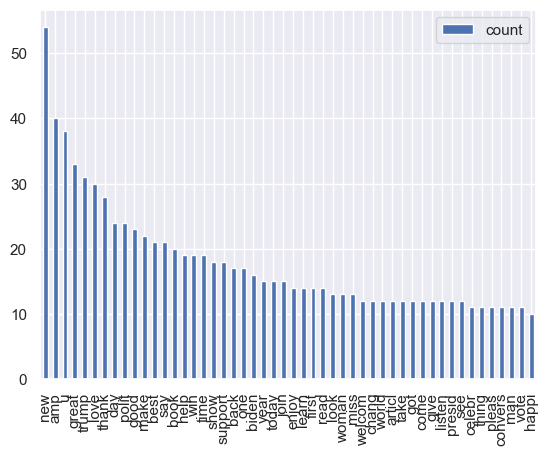

In [373]:
ny_cloud_df.sort_values(by="count", ascending=False)[:50].plot(kind="bar")

In [346]:
texas_cloud = {'bright': 2, 'spot': 4, 'polit': 7, 'bipartisan': 3, 'olymp': 1, 'joy': 1, 'new': 23, 'harri': 1, 'easi': 1, 'progress': 6, 'instantan': 1, 'commit': 2, 'right': 5, 'senior': 1, 'find': 3, 'passion': 1, 'dc': 2, 'internship': 1, 'gcu': 1, 'today': 7, 'matter': 3, 'san': 5, 'tax': 4, 'dollar': 1, 'spent': 2, 'charg': 1, 'station': 2, 'huge': 5, 'ev': 3, 'compani': 4, 'break': 2, 'vehicl': 1, 'arent': 2, 'cheaper': 1, 'win': 9, 'corpor': 1, 'spend': 2, '60k': 1, 'decent': 1, 'thought': 3, 'plz': 1, 'respect': 2, 'therev': 1, 'femal': 1, 'governor': 5, 'american': 5, 'state': 16, 'v': 6, 'male': 1, 'least': 3, 'men': 2, 'havent': 1, 'bang': 1, 'job': 5, 'love': 12, 'see': 7, 'woman': 5, 'give': 4, 'boot': 1, 'work': 10, 'campaign': 3, 'lot': 6, 'happi': 6, 'birthday': 2, 'wish': 4, 'spencer': 1, 'reason': 2, 'episod': 8, 'everi': 6, 'week': 4, 'check': 8, 'latest': 2, 'handi': 1, 'take': 8, 'listen': 4, 'healthier': 1, 'possibl': 1, 'yahoo': 1, 'great': 32, 'morn': 4, 'bid': 2, 'year': 15, 'old': 2, 'domain': 1, 'name': 2, 'live': 3, 'auction': 1, 'ltltlt': 2, 'pictur': 3, 'made': 5, 'day': 17, 'weekend': 3, 'annual': 3, 'sale': 1, 'holiday': 1, 'school': 2, 'suppli': 1, 'cloth': 1, 'texa': 28, 'comptrol': 1, 'estim': 1, 'shopper': 1, 'save': 5, 'million': 1, 'local': 5, 'three': 2, 'found': 1, 'portrait': 1, 'archiv': 1, 'dive': 3, 'merch': 1, 'final': 4, 'avail': 4, 'design': 2, 'seen': 2, 'shirt': 1, 'koozi': 1, 'sticker': 1, 'pack': 2, 'preorder': 1, 'although': 1, 'mind': 2, 'opaqu': 1, 'tri': 1, 'think': 4, 'sake': 1, 'futur': 3, 'still': 5, 'look': 7, 'good': 25, 'youv': 2, 'got': 3, 'time': 14, 'rectifi': 1, 'thing': 6, 'readi': 1, 'big': 10, 'push': 3, 'traitor': 1, 'fda': 1, 'plan': 3, 'approv': 4, 'pfizer': 1, 'covid': 1, 'vaccin': 1, 'labor': 1, 'stand': 7, 'end': 3, 'special': 4, 'session': 2, 'approach': 1, 'next': 4, 'step': 2, 'republican': 4, 'democrat': 6, 'tour': 1, 'hit': 1, 'promot': 1, 'biden': 7, 'administr': 1, 'trillion': 2, 'infrastructur': 4, 'packag': 2, 'ahead': 1, 'elect': 13, 'cycl': 1, 'grow': 2, 'divers': 3, 'jose': 1, 'signal': 1, 'rise': 1, 'jo': 2, 'spotlight': 4, 'thank': 16, 'donna': 1, 'campbel': 1, 'md': 1, 'confer': 2, 'springer': 1, 'politician': 5, 'pancak': 1, 'wont': 1, 'cuddl': 1, 'pedic': 1, 'pillow': 1, 'innov': 1, 'part': 2, 'cool': 3, 'system': 3, 'hey': 3, 'remind': 5, 'favorit': 1, 'send': 2, 'guess': 2, 'creat': 4, 'poll': 2, 'top': 2, 'help': 13, 'narrow': 2, 'fun': 4, 'account': 1, 'opensea': 1, 'censu': 1, 'data': 2, 'releas': 1, 'show': 5, 'explos': 1, 'growth': 3, 'past': 1, 'decad': 2, 'power': 5, 'peopl': 9, 'color': 2, 'first': 3, 'back': 11, 'zoom': 2, 'meet': 6, 'tonight': 2, '6pm': 1, 'receiv': 3, 'email': 1, 'u': 16, 'pleas': 5, 'dm': 1, 'link': 2, 'excit': 4, 'evil': 2, 'stage': 2, 'short': 2, 'cogent': 1, 'sum': 1, 'deserv': 3, 'support': 4, 'lite': 1, 'guv': 1, 'import': 6, 'messag': 3, 'apolit': 1, 'player': 1, 'stay': 4, 'field': 2, 'amp': 25, 'trade': 2, 'recent': 3, 'glad': 3, 'hasnt': 2, 'lost': 1, 'valu': 4, 'go': 12, 'toro': 1, 'stro': 1, 'crypto': 2, 'bring': 7, 'awaken': 1, 'runoff': 1, 'victoria': 1, 'learn': 6, 'experi': 2, 'piec': 2, 'colleagu': 1, 'deep': 2, 'number': 1, 'geek': 1, 'unpack': 1, 'let': 8, 'continu': 3, 'sign': 2, 'rt': 1, 'petit': 1, 'reach': 1, 'goal': 1, 'wouldnt': 2, 'wonder': 1, 'ann': 1, 'richard': 1, 'berni': 1, 'sander': 1, 'need': 10, 'knew': 1, 'usher': 1, 'polici': 3, 'younger': 1, 'gener': 3, 'lead': 1, 'countri': 6, 'warmong': 1, 'money': 1, 'theiev': 1, 'kept': 2, 'im': 11, 'saywer': 1, 'wait': 2, 'weve': 3, 'quietli': 1, 'season': 1, 'chang': 11, 'oct': 1, 'topic': 3, 'tweopl': 1, 'subscrib': 2, 'everywher': 1, 'podcast': 5, 'host': 1, 'share': 4, 'friend': 5, 'timelin': 2, 'make': 13, 'oklahoma': 2, 'transpar': 1, 'access': 2, 'watch': 2, 'vision': 2, 'counti': 6, 'practic': 3, 'bank': 2, 'busi': 2, 'invest': 1, 'thorough': 1, 'entrepreneur': 1, 'incub': 1, 'acceler': 1, 'program': 4, 'proud': 1, 'announc': 3, 'launch': 1, 'websit': 3, 'post': 5, 'review': 7, 'legisl': 3, 'noth': 3, 'directli': 1, 'impact': 2, 'industri': 1, 'howev': 1, 'idea': 3, 'keep': 2, 'capitol': 2, 'read': 9, 'hooray': 1, 'nation': 6, 'ward': 1, 'anoth': 5, 'best': 12, 'barbado': 1, '1st': 1, 'newli': 1, 'presid': 7, 'talk': 15, 'five': 1, 'discu': 2, 'one': 9, 'critic': 1, 'confirm': 1, 'someth': 3, 'voic': 1, 'put': 2, 'say': 4, 'anyon': 3, 'els': 4, 'retir': 1, 'better': 8, 'man': 3, 'come': 4, 'along': 1, 'way': 4, 'kennith': 1, 'miller': 1, 'struck': 1, 'though': 4, 'call': 2, 'liber': 1, 'label': 1, 'conserv': 7, 'libertarian': 1, 'judg': 3, 'easier': 1, 'mean': 1, 'interest': 13, 'dynam': 1, 'primari': 1, 'race': 6, 'movi': 2, 'w': 3, 'greatest': 3, 'true': 3, 'forward': 1, 'interview': 3, 'commish': 1, 'radio': 2, 'ambassador': 2, 'discuss': 5, 'district': 3, 'attorney': 2, 'vote': 2, 'felin': 1, 'kitti': 1, 'even': 5, 'dog': 2, 'workforc': 1, 'commiss': 2, 'onetim': 1, 'fund': 4, 'billion': 2, 'childcar': 1, 'provid': 2, 'overcom': 2, 'covid19': 2, 'start': 1, 'enjoy': 7, 'dem': 1, 'absolut': 2, 'fing': 1, 'midterm': 5, 'cours': 2, 'reconcili': 1, 'bill': 2, 'actual': 1, 'far': 6, 'bbb': 1, 'congress': 2, 'pass': 1, 'deliv': 1, 'major': 2, 'econom': 2, 'rebound': 2, 'coronaviru': 1, 'pandem': 2, 'robust': 1, 'project': 2, '1264b': 1, 'raini': 1, '1199b': 1, 'discretionari': 1, 'revenu': 1, 'august': 1, 'wow': 1, 'fine': 1, 'crazi': 1, 'realli': 3, 'happen': 2, 'list': 2, 'includ': 3, 'ok': 2, 'serious': 2, 'lord': 2, 'done': 4, 'itch': 1, 'singl': 2, 'level': 3, 'govern': 3, 'know': 4, 'may': 3, 'congratul': 1, 'robert': 2, 'santo': 1, 'histor': 4, 'appoint': 1, 'statistician': 1, 'stori': 2, 'last': 4, 'night': 3, 'buck': 1, 'beat': 2, 'term': 1, 'candid': 7, 'farmer': 1, 'pitchfork': 1, 'meant': 1, 'free': 1, 'ebook': 1, 'blog': 3, 'page': 2, 'voter': 2, 'eight': 1, 'propos': 1, 'amend': 1, 'constitut': 1, 'tuesday': 2, 'fivethirtyeight': 2, 'univers': 1, 'wisdom': 1, 'mani': 2, 'novemb': 1, '2nd': 1, 'clich': 1, 'word': 2, 'attain': 1, 'direct': 2, 'democraci': 1, 'never': 1, 'kind': 2, 'assemblyman': 1, 'nichola': 1, 'chiaravalloti': 1, 'mayb': 3, 'upcom': 4, 'town': 2, 'hall': 1, 'citi': 2, 'councilman': 1, 'junior': 1, 'ezeonu': 1, 'well': 8, 'wasnt': 1, 'lol': 2, 'gp': 1, 'festiv': 1, 'among': 1, 'alongsid': 1, 'event': 3, 'reelect': 2, 'convers': 6, 'prepar': 1, 'oil': 2, 'use': 3, 'excerpt': 1, 'key': 2, 'breakthrough': 2, 'allow': 2, 'everyon': 7, 'involv': 5, 'behind': 1, 'scene': 1, 'entir': 3, 'suddenli': 1, 'percept': 1, 'tribal': 2, 'shouti': 1, 'minor': 1, 'facebook': 1, 'toxic': 1, 'excel': 3, 'articl': 5, 'social': 1, 'medium': 2, 'seek': 1, 'bask': 1, 'victori': 2, 'differ': 3, 'chico': 2, 'enterpriserecord': 1, 'asian': 1, 'stride': 1, 'represent': 2, 'turn': 2, 'john': 1, 'whitmir': 1, 'run': 5, 'senat': 3, 'mayor': 1, 'houston': 1, 'attend': 1, 'sit': 1, 'pay': 1, 'attent': 2, 'gtgt': 2, 'congrat': 1, 'side': 2, 'commun': 3, 'middl': 2, 'ground': 1, 'respond': 1, 'young': 1, 'imperson': 1, 'impress': 1, 'book': 10, 'financi': 3, 'posit': 1, 'follow': 3, 'straight': 1, 'road': 1, 'achiev': 1, 'fulfil': 1, 'career': 2, 'belong': 1, 'box': 1, 'multidimension': 1, 'elig': 1, '12th': 1, 'tx': 1, 'rememb': 2, 'clearli': 1, 'gora': 1, 'offic': 3, 'sinc': 2, 'orourk': 1, 'recognit': 1, 'fundrais': 1, 'capabl': 1, 'contend': 1, 'shop': 1, 'groceri': 1, 'inflat': 1, 'without': 1, 'rais': 1, 'hand': 2, 'acknowledg': 1, 'brilliant': 1, 'togeth': 4, 'awkward': 1, 'famili': 3, 'thanksgiv': 1, 'might': 1, 'newsweek': 1, 'hear': 2, 'china': 1, 'tenni': 1, 'star': 2, 'aliv': 1, 'dalla': 2, 'clay': 1, 'jenkin': 1, 'score': 2, 'court': 1, 'face': 3, 'worldwid': 1, 'much': 2, 'align': 1, 'essay': 1, 'inflect': 1, 'point': 1, 'risk': 1, 'model': 1, 'extrem': 1, 'manag': 2, 'room': 1, 'left': 2, 'nice': 1, 'guy': 2, 'larri': 1, 'hopkin': 1, 'opinion': 3, 'courier': 1, 'journal': 3, 'cat': 2, 'emmi': 2, 'add': 1, 'two': 2, 'complet': 2, 'organ': 2, 'convo': 1, 'bet': 1, 'hot': 1, 'sport': 1, 'hometown': 1, 'honor': 3, 'militari': 1, 'servic': 2, 'fox': 2, 'honestli': 1, 'wellwritten': 1, 'jazzi': 1, 'enemi': 2, 'jame': 1, 'graham': 1, 'superb': 1, 'studi': 1, 'guardian': 1, 'wall': 6, 'street': 4, 'icymi': 1, 'member': 2, 'un': 1, 'educ': 2, 'scientif': 1, 'cultur': 1, 'adopt': 1, 'agreement': 1, 'defin': 1, 'common': 1, 'principl': 1, 'ensur': 1, 'healthi': 1, 'ai': 1, 'develop': 1, 'novel': 1, 'network': 1, 'nana': 1, 'worship': 1, 'eras': 1, 'lgbtq': 1, 'grief': 1, 'civil': 1, 'congression': 2, 'intern': 2, 'rest': 1, 'ye': 3, 'parti': 2, 'pulpit': 1, 'christma': 1, 'relief': 1, 'longview': 1, 'newsjourn': 1, 'public': 1, 'util': 2, 'electr': 1, 'market': 1, 'grid': 1, 'reliabl': 1, 'north': 1, 'shropshir': 1, 'saw': 2, 'septic': 1, 'tank': 1, 'pumper': 1, 'truck': 1, 'drive': 1, 'near': 1, 'dream': 1, 'america': 2, 'forgotten': 1, 'clear': 3, 'path': 2, 'clean': 2, 'energi': 1, 'ga': 1, 'pave': 1, 'legal': 1, 'citizenship': 1, 'dreamer': 1, 'yall': 2, 'stream': 1, 'comment': 2, 'stuff': 1, 'inform': 3, 'entertain': 2, 'tune': 1, 'hard': 3, 'tarrant': 2, 'join': 8, 'youll': 1, 'howgt': 1, 'former': 3, 'railroad': 1, 'commission': 1, 'michael': 2, 'william': 2, 'lunch': 3, 'catch': 1, 'ask': 3, 'grab': 1, 'thread': 1, 'worth': 4, 'januari': 1, 'probabl': 1, 'arkansa': 1, 'isnt': 1, 'bad': 1, 'consid': 4, 'publish': 1, 'improv': 2, 'rank': 1, 'seo': 1, 'increas': 4, 'embolden': 1, 'stronger': 1, 'foothold': 1, 'south': 2, 'presidenti': 1, 'competit': 1, 'midst': 1, 'crisi': 1, 'death': 1, 'class': 1, 'multibillionair': 1, 'wealth': 1, 'soar': 1, 'record': 1, 'luck': 3, 'pandemicyour': 1, 'charlott': 2, 'axio': 1, 'document': 1, 'chao': 2, 'acquisit': 1, 'brandon': 3, 'tweet': 4, 'belief': 1, 'pc': 1, 'believ': 2, 'twogend': 1, 'samesex': 1, 'marriag': 1, 'life': 4, 'concept': 2, 'christ': 1, 'gordon': 1, 'ramsay': 1, 'england': 1, 'lobster': 1, 'roll': 1, 'indepth': 1, 'repres': 1, 'colleg': 2, 'stalwart': 1, 'son': 1, 'aampm': 1, 'legend': 1, 'plu': 1, 'nuclear': 1, 'fusion': 1, 'regulatori': 1, 'clariti': 1, 'ftx': 1, 'boss': 1, 'simpli': 1, 'northern': 1, 'nicer': 1, 'water': 1, 'cleaner': 1, 'nobodi': 1, 'complain': 1, 'restaur': 1, 'bar': 1, 'leav': 2, 'border': 2, 'alon': 1, 'brad': 1, 'namdar': 1, 'answer': 1, 'tx32': 1, 'track': 1, 'em': 1, 'kindl': 1, 'version': 1, 'rage': 1, 'click': 2, 'purchas': 1, 'ut': 1, 'tylerdalla': 1, 'seem': 1, 'favor': 2, 'bigger': 2, 'cohost': 1, 'candac': 3, 'jone': 1, 'kill': 1, 'produc': 2, 'jimmi': 1, 'harvuni': 1, 'role': 1, 'lt': 1, 'gov': 1, 'dan': 1, 'patrick': 1, 'play': 3, 'leap': 1, 'human': 1, 'makeand': 1, 'fast': 1, 'earn': 1, 'ball': 2, 'fold': 1, 'mob': 1, 'twitter': 3, 'profil': 2, 'coupl': 1, 'nonstop': 1, 'spotifi': 1, 'apart': 1, 'guest': 3, 'tntn': 2, 'girl': 2, 'joseph': 2, 'platform': 2, 'thoroughli': 1, 'hold': 1, 'rashard': 1, 'baylor': 1, 'marcu': 1, 'johnson': 1, 'embroil': 1, 'boost': 1, 'invers': 1, 'gold': 1, 'game': 3, 'athlet': 1, 'shine': 1, 'reuter': 1, 'string': 1, 'usu': 1, 'encourag': 3, 'utah': 2, 'abc': 1, 'classroom': 2, 'teacher': 1, 'teach': 1, 'kid': 2, 'parent': 2, 'decid': 1, 'child': 1, 'lt3': 1, 'welcom': 4, 'feb': 1, 'invit': 2, 'peep': 1, 'visit': 1, 'specif': 1, 'bottom': 1, 'sentenc': 1, 'barr': 1, 'reveal': 1, 'determin': 1, 'lose': 1, 'betray': 1, 'incred': 2, 'separ': 1, 'appsplatform': 1, 'purpos': 1, 'etc': 1, 'actaulli': 1, 'ideal': 1, 'imposs': 1, 'everyth': 1, 'fb': 1, 'exampl': 1, 'classic': 1, 'somewhat': 1, 'anim': 1, 'farm': 1, 'summari': 1, 'analysi': 2, 'credibl': 1, 'verifi': 1, 'anywher': 1, 'long': 1, 'onlin': 1, 'mediamarket': 1, 'understand': 2, 'utm': 1, 'ppc': 1, 'type': 1, 'warn': 1, 'detail': 1, 'worthi': 1, 'debat': 1, 'oh': 1, 'vacat': 1, 'instead': 2, 'tournament': 1, 'compet': 1, 'roster': 1, 'scholarship': 1, 'awesom': 2, 'ceo': 1, 'nasdaq': 1, 'phun': 1, 'intersect': 1, 'relat': 1, 'safe': 1, 'brand': 1, 'someon': 1, 'gramp': 1, 'reflect': 2, 'histori': 2, 'normal': 1, 'site': 1, 'origin': 1, 'write': 1, 'want': 5, 'raiderland': 1, 'agre': 1, 'appreci': 3, 'applaud': 1, 'tenac': 1, 'bold': 1, 'ill': 1, 'gladli': 1, 'whatev': 1, 'move': 1, 'inch': 1, 'center': 1, 'speaker': 1, 'testimoni': 1, 'uae': 1, 'washington': 2, 'said': 1, 'product': 2, 'opec': 1, 'higher': 1, 'uic': 1, 'alway': 3, 'sometim': 1, 'act': 1, 'courag': 1, 'braggin': 1, 'soon': 1, 'trump': 2, 'obama': 1, 'war': 2, 'saturday': 1, 'connect': 1, 'dot': 1, 'christian': 1, 'coffe': 1, '10am': 1, 'west': 1, 'theatr': 1, 'vickeri': 1, 'fort': 1, 'mask': 1, 'option': 2, 'pac': 1, 'came': 1, 'despit': 1, 'disadvantag': 1, 'predecessor': 1, 'followpleas': 1, 'delici': 1, 'sweeti': 2, 'pie': 1, 'ribey': 1, 'littl': 1, 'decatur': 1, 'church': 2, 'beauti': 3, 'sunday': 1, 'god': 2, 'bless': 4, 'hadrian': 1, 'built': 2, 'ad': 1, 'surviv': 1, 'promis': 1, 'build': 1, 'mile': 2, 'secondari': 1, 'approx': 1, 'hope': 3, 'litig': 1, 'n': 1, 'tribe': 1, 'settlement': 1, 'cleanup': 1, 'mr': 1, 'vanc': 1, 'beaver': 2, 'utopia': 1, 'flashback': 1, 'friday': 1, 'eventcheck': 1, 'radic': 1, 'must': 3, 'patriot': 1, 'mosbach': 1, 'jr': 1, 'insight': 2, 'grate': 1, 'attende': 1, 'miss': 2, 'whole': 1, 'onto': 1, 'weird': 1, 'interviewe': 1, 'engag': 2, 'ive': 1, 'sever': 1, 'video': 4, 'readth': 1, 'fall': 1, 'epic': 1, 'offer': 1, 'housegreat': 1, 'auku': 1, 'cooper': 1, 'india': 2, 'ted': 1, 'cruz': 1, 'gift': 1, 'theyr': 1, 'will': 1, 'merri': 1, 'jolli': 1, 'navig': 1, 'embrac': 1, 'scienc': 1, 'leader': 1, 'texan': 1, 'group': 1, 'wedg': 1, 'issu': 2, 'taliban': 1, 'hardlin': 1, 'fastestgrow': 1, 'region': 1, 'newcom': 1, 'kickstart': 1, 'followup': 1, 'mention': 1, 'lawgiv': 1, 'strategi': 1, 'jam': 1, 'lg': 1, 'ii': 1, 'summer': 1, 'popular': 1, 'sure': 4, 'effect': 1, 'regard': 1, 'rivalri': 1, 'order': 1, 'red': 1, 'tast': 1, 'cherri': 1, 'wednesday': 1, 'wild': 1, 'chair': 1, 'tip': 1, 'qualiti': 1, 'latino': 1, 'thrive': 1, 'sonia': 1, 'rivera': 1, 'journey': 1, 'secret': 1, 'resili': 1, 'challeng': 1, 'joe': 2, 'finest': 2, 'moment': 3, 'shout': 1, 'movement': 1, 'messeng': 1, 'monday': 1, '6am10am': 1, 'ct': 1, 'wonderfulproblem': 1, 'solv': 1, 'nonpartisanship': 1, 'film': 1, 'integr': 1, 'remot': 1, 'quicker': 1, 'broad': 1, 'rid': 1, 'margin': 2, 'societi': 2, 'despot': 1, 'strongmen': 1, 'feed': 1, 'fight': 2, 'sponsor': 1, 'buy': 1, 'ticket': 1, 'beyond': 1, 'ftw': 1, 'parton': 1, 'heartblood': 1, 'mark': 2, 'seal': 1, 'client': 1, 'execut': 1, 'director': 1, 'brief': 1, 'staff': 1, 'telecom': 1, 'broadband': 1, 'channel': 1, 'bender': 1, 'york': 1, 'moral': 1, 'freedom': 3, 'base': 1, 'grace': 2, 'place': 1, 'troubl': 1, 'baptiz': 1, 'lakewood': 1, 'infuri': 1, 'overturn': 1, 'opportun': 1, 'liberti': 1, 'fair': 2, 'devot': 1, 'ronald': 1, 'reagan': 1, 'usfl': 1, 'footbal': 1, 'choos': 1, 'super': 1, 'folk': 1, 'factcheck': 1, 'statist': 2, 'rhetor': 1, 'aggress': 1, 'trend': 1, 'desir': 1, 'heart': 1, 'illinoi': 2, 'hochul': 1, 'zeldin': 1, 'linkedin': 1, 'cofound': 1, 'hoffman': 1, 'central': 1, 'glimmer': 1, 'coolest': 1, 'bravest': 1, 'sheriff': 1, 'solut': 1, 'latter': 1, 'stun': 1, 'gain': 1, 'black': 1, 'toward': 1, 'governorship': 1, 'fan': 2, 'commend': 1, '4press': 1, 'conferencetak': 1, 'media': 1, 'tough': 1, 'question': 1, 'contract': 1, 'admir': 1, 'bay': 1, 'smart': 1, 'juli': 1, 'across': 1, 'ya': 1, 'gon': 1, 'na': 1, 'spit': 1, 'loud': 1, 'person': 1, 'niceguy': 2, 'emerg': 2, 'content': 2, 'report': 1, 'view': 1, 'bot': 1, 'decrimin': 1, 'magic': 1, 'mushroom': 2, 'plant': 1, 'medicin': 1, 'therapi': 1, 'potenti': 1, 'food': 1, 'highlight': 1, 'cb': 1, 'chicago': 1, 'code': 1, 'core': 1, 'balanc': 1, 'calm': 1, 'individu': 1, 'present': 1, 'denis': 1, 'cnn chronlaw': 8, 'chronlaw polit': 43, 'polit new': 43, 'kamala harri': 3, 'highestrank mom': 2, 'francisco chronicl': 2, 'state sen': 3, 'address membership': 2, 'telephon associ': 3, 'flip flop': 2, 'republican primari': 3, 'look forward': 5, 'bitcoin ethereum': 3, 'ethereum web3': 3, 'web3 alreadi': 3, 'alreadi reshap': 3, 'reshap world': 3, 'world foreign': 3, 'foreign polici': 3, 'bob dole': 2, 'mostli peac': 4, 'peac book': 4, 'andrew jerri': 2, 'thug note': 2, 'selfexil politico': 2}

In [347]:
tx_cloud_df = pd.DataFrame(list(texas_cloud.items()), columns=['word', 'count'])


<AxesSubplot:xlabel='word'>

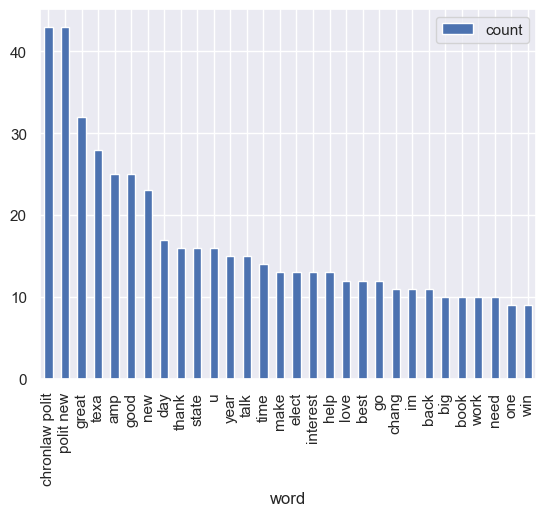

In [374]:
tx_cloud_df.sort_values(by="count", ascending=False)[:30].set_index('word').plot(kind="bar")


In [356]:
tx_cloud_df.loc("democrat")

ValueError: No axis named democrat for object type DataFrame

In [ ]:
 WordCloud().process_text('penn penn penn penn penn state state state state uni uni uni college college university states vice president vice president vice president vice president vice president vice president vice president')
{'penn': 5, 'state': 5, 'uni': 3, 'college': 2, 'university': 1, 'vice president': 7}

In [219]:


def create_word_cloud(state_1, state_2):
    # Create three figures
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
    state_1 = state_1
    state_2 = state_2
    sentiment_1 = "negative"
    sentiment_2 = "neutral"
    sentiment_3 = "positive"
    stop_words = ["amp", "new","report", "say", "u", "face", "call", "watch", "counld", "use", "via"]
    # Plot data on the first two axes

    new_1 = df[(df["locations"] == state_1) & (df['roberta_sentiment'] == sentiment_1)].copy()
    new_2 = df[(df["locations"] == state_2) & (df['roberta_sentiment'] == sentiment_1)].copy()

    hashtags_1 = new_1["final_clean_text"]
    hashtags_2 = new_2["final_clean_text"]


    # Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
    new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

    # Filter out any non-string values in the 'clean_hashtags' column using .loc
    hashtags_list_1 = hashtags_1.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_1 = ' '.join(hashtags_list_1)

    hashtags_list_2 = hashtags_2.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_2 = ' '.join(hashtags_list_2)

    # Generate a word cloud from the hashtags string
    wordcloud_1 = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str_1)
    wordcloud_2 = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str_2)

    axes[0, 0].imshow(wordcloud_1)
    axes[0, 0].set_title(f'Wordcloud for {sentiment_1} sentiment in {state_1}')
    axes[0, 0].axis("off")


    axes[1, 0].imshow(wordcloud_2)
    axes[1, 0].set_title(f'Wordcloud for {sentiment_1} sentiment in {state_2}')
    axes[1, 0].axis("off")
    
    #################

    new_1 = df[(df["locations"] == state_1) & (df['roberta_sentiment'] == sentiment_2)].copy()
    new_2 = df[(df["locations"] == state_2) & (df['roberta_sentiment'] == sentiment_2)].copy()


    hashtags_1 = new_1["final_clean_text"]
    hashtags_2 = new_2["final_clean_text"]


    # Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
    new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

    # Filter out any non-string values in the 'clean_hashtags' column using .loc
    hashtags_list_1 = hashtags_1.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_1 = ' '.join(hashtags_list_1)

    hashtags_list_2 = hashtags_2.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_2 = ' '.join(hashtags_list_2)

    # Generate a word cloud from the hashtags string
    wordcloud_1 = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str_1)
    wordcloud_2 = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str_2)

    axes[0, 1].imshow(wordcloud_1)
    axes[0, 1].set_title(f'Wordcloud for {sentiment_2} sentiment in {state_1}')
    axes[0, 1].axis("off")


    axes[1, 1].imshow(wordcloud_2)
    axes[1, 1].set_title(f'Wordcloud for {sentiment_2} sentiment in {state_2}')
    axes[1, 1].axis("off")



    #############
    # Include the word cloud in the third figure


    new_1 = df[(df["locations"] == state_1) & (df['roberta_sentiment'] == sentiment_2)].copy()
    new_2 = df[(df["locations"] == state_2) & (df['roberta_sentiment'] == sentiment_2)].copy()

    hashtags_1 = new_1["final_clean_text"]
    hashtags_2 = new_2["final_clean_text"]


    # Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
    new.loc[:, "final_clean_text"] = new.loc[:, "final_clean_text"].fillna('')

    # Filter out any non-string values in the 'clean_hashtags' column using .loc
    hashtags_list_1 = hashtags_1.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_1 = ' '.join(hashtags_list_1)

    hashtags_list_2 = hashtags_2.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_2 = ' '.join(hashtags_list_2)

    # Generate a word cloud from the hashtags string
    wordcloud_1 = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str_1)
    wordcloud_2 = WordCloud(width=800, height=800, background_color='black', stopwords=stop_words).generate(hashtags_str_2)

    axes[0, 2].imshow(wordcloud_1)
    axes[0, 2].set_title(f'Wordcloud for {sentiment_3} sentiment in {state_1}')
    axes[0, 2].axis("off")


    axes[1, 2].imshow(wordcloud_2)
    axes[1, 2].set_title(f'Wordcloud for {sentiment_3} sentiment in {state_2}')
    axes[1, 2].axis("off")



# Display the figures
    return plt.show()
    

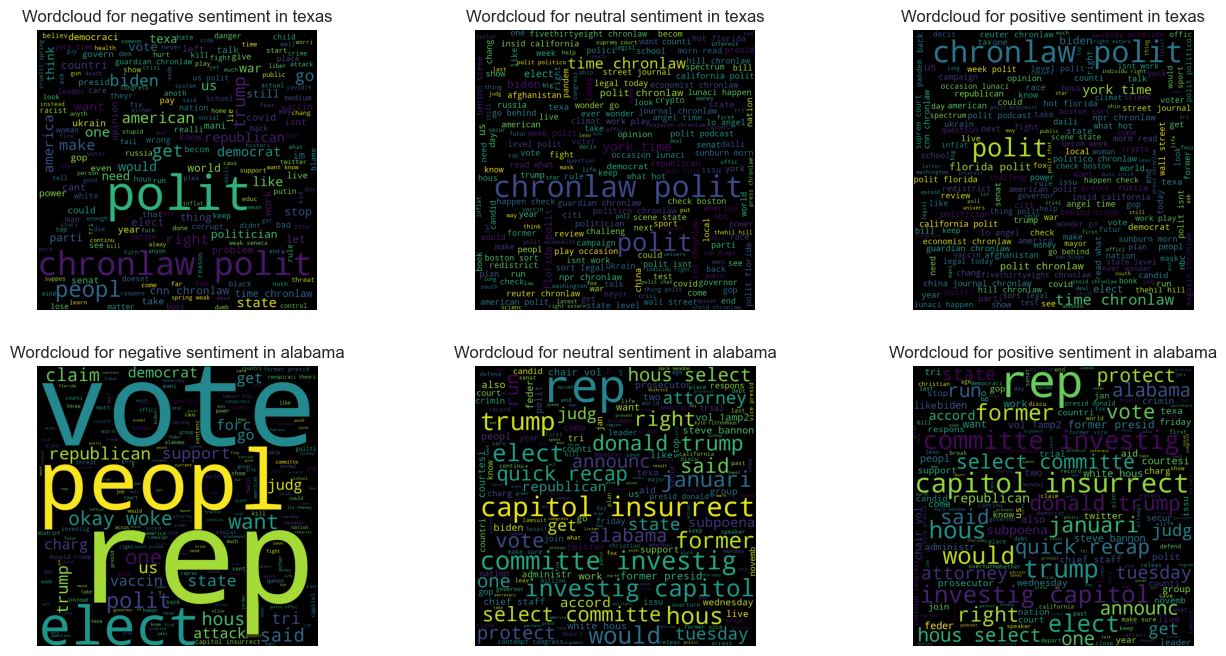

In [220]:
create_word_cloud("texas","alabama")

In [221]:
create_word_cloud("idaho","kentucky")

**how ofter biden in present in the tweets in all**

In [247]:
all_positive = df[df["roberta_sentiment"]=="positive"]
all_negative = df[df["roberta_sentiment"]=="negative"]
all_neutral = df[df["roberta_sentiment"]=="neutral"]

In [273]:
def neutral_counts(name):
    text = name
    total_len = sum(1 for x in df["final_clean_text"] if pd.notnull(x) and text in x)
    count = 0
    for i in all_neutral["final_clean_text"]:
        if pd.notnull(i) and text in i:
            count+=1
    return(f"{text} is mentioned {count} times in neutral tweet out of {total_len} total mentions.")

In [274]:
def negative_counts(name):
    text = name
    total_len = sum(1 for x in df["final_clean_text"] if pd.notnull(x) and text in x)
    count = 0
    for i in all_negative["final_clean_text"]:
        if pd.notnull(i) and text in i:
            count+=1
    return(f"{text} is mentioned {count} times in negative tweet out of {total_len} total mentions.")

In [275]:
def positive_counts(name):
    text = name
    total_len = sum(1 for x in df["final_clean_text"] if pd.notnull(x) and text in x)
    count = 0
    for i in all_positive["final_clean_text"]:
        if pd.notnull(i) and text in i:
            count+=1
    return(f"{text} is mentioned {count} times in positive tweet out of {total_len} total mentions.")
        

In [276]:
print(positive_counts("biden"))
print(positive_counts("trump"))
print(negative_counts("biden"))
print(negative_counts("trump"))
print(neutral_counts("biden"))
print(neutral_counts("trump"))

biden is mentioned 159 times in positive tweet out of 3248 total mentions.
trump is mentioned 145 times in positive tweet out of 5440 total mentions.
biden is mentioned 1173 times in negative tweet out of 3248 total mentions.
trump is mentioned 2634 times in negative tweet out of 5440 total mentions.
biden is mentioned 1916 times in neutral tweet out of 3248 total mentions.
trump is mentioned 2661 times in neutral tweet out of 5440 total mentions.


In [281]:
df


date_created                                   user_description  \
0      7/30/21 23:53  Sociafy is an influencer-based content discove...   
1      7/30/21 23:51  Home of Crypto Communities. $ATMOS \n\nhttps:/...   
2      7/30/21 23:50  Developer, Artist, Investor, Entrepreneur, Eff...   
3      7/30/21 23:49  Comprehensive, up-to-date news coverage, aggre...   
4      7/30/21 23:49  Gay Progressive Patriot. #NYC's the greatest c...   
...              ...                                                ...   
72797  8/15/22 22:06  Gay Progressive Patriot. #NYC's the greatest c...   
72798  8/15/22 22:01  Runs @GeekAlabama; #Aspie proud! #ASD.  I‚Äö√Ñ...   
72799  8/15/22 22:01  Board Certified | CEO @NeighborhoodPsy Writer ...   
72800  8/15/22 21:59  Israel Cruz is running for U.S. Senate in the ...   
72801  8/15/22 21:57  Profile run by Lucky (the monster) (ze/hir/hir...   

         user_created  user_followers  user_friends  user_favourites  \
0        9/30/11 5:59           36219           181              930   
1        2/9/17 23:15            2426          1104             8173   
2         7/9/09 4:07             495          2681             6930   
3        7/24/17 7:39             340           114                1   
4       6/20/08 18:32            6451          2806             4257   
...               ...             ...           ...              ...   
72797   6/20/08 18:32            6343          2786             4226   
72798   4/27/09 20:24            4668          5122           112650   
72799    3/21/08 4:29            3397          2163             3541   
72800  10/13/21 18:18            1159          1469             1459   
72801    6/4/21 23:31              69           739              665   

       user_verified           date  is_retweet month_year includes_abortion  \
0              False  7/30/21 23:53       False     21-Jul                no   
1              False  7/30/21 23:51       False     21-Jul                no   
2              False  7/30/21 23:50       False     21-Jul                no   
3              False  7/30/21 23:49       False     21-Jul                no   
4              False  7/30/21 23:49       False     21-Jul                no   
...              ...            ...         ...        ...               ...   
72797          False  8/15/22 22:06       False     22-Aug                no   
72798          False  8/15/22 22:01       False     22-Aug                no   
72799          False  8/15/22 22:01       False     22-Aug                no   
72800          False  8/15/22 21:59       False     22-Aug                no   
72801          False  8/15/22 21:57       False     22-Aug                no   

           locations blob_sentiment  \
0      united states        neutral   
1      united states        neutral   
2         california        neutral   
3      united states        neutral   
4           new york       negative   
...              ...            ...   
72797       new york        neutral   
72798        alabama        neutral   
72799       new york        neutral   
72800   pennsylvania        neutral   
72801     california        neutral   

                                          clean_hashtags  \
0                                        politics videos   
1                                          blog politics   
2                                   politics justice war   
3      news covid usa canada uk instagram love corona...   
4                              politics trump corruption   
...                                                  ...   
72797                          politics trump corruption   
72798  video politics liberal liberallogic woke woken...   
72799  psychology evil politics psychiatry law humani...   
72800                      PA Politics Fetterman StopIDL   
72801  demonicmachines politics thismachinekillsfascists   

                                        final_clean_text roberta_sentiment  
0             

<AxesSubplot:xlabel='roberta_sentiment'>

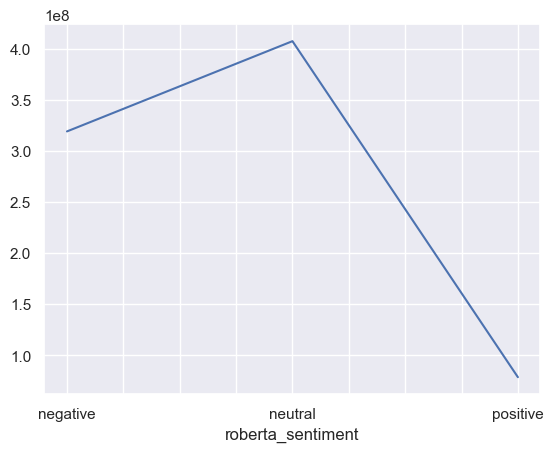

In [284]:
df.groupby("roberta_sentiment")["user_favourites"].sum().plot()

In [287]:
(df.groupby("roberta_sentiment")["user_favourites"].sum()
 .reindex(["negative", "neutral", "positive"])).plot(kind="bar",color=colors)
plt.title("Number of likes by Sentiment catergory");

In [288]:
df.columns

Index(['date_created', 'user_description', 'user_created', 'user_followers',
       'user_friends', 'user_favourites', 'user_verified', 'date',
       'is_retweet', 'month_year', 'includes_abortion', 'locations',
       'blob_sentiment', 'clean_hashtags', 'final_clean_text',
       'roberta_sentiment'],
      dtype='object')

In [290]:
(df.groupby("roberta_sentiment")["user_friends"].sum()
 .reindex(["negative", "neutral", "positive"])).plot(kind="bar",color=colors)
plt.title("Number friends by Sentiment catergory");

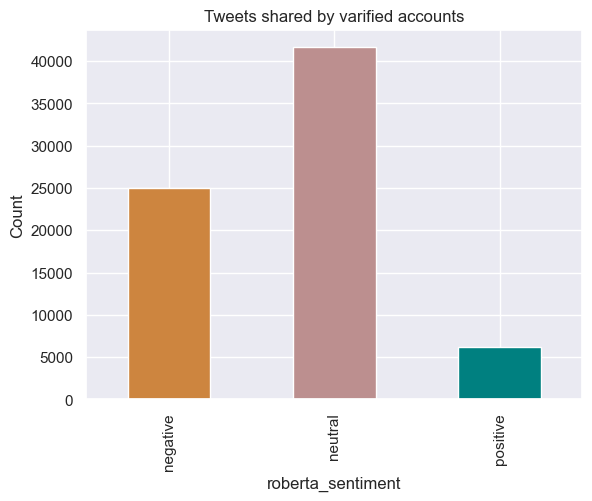

In [293]:
(df.groupby("roberta_sentiment")["user_verified"].count()
 .reindex(["negative", "neutral", "positive"])).plot(kind="bar",color=colors)
plt.ylabel("Count")
plt.title("Tweets shared by varified accounts");

In [378]:
(df.groupby("roberta_sentiment")["user_verified"].count()
 .reindex(["negative", "neutral", "positive"])).plot(kind="bar",color=colors)
plt.title("Number of likes by Sentiment catergory");